<a href="https://colab.research.google.com/github/Amanverma783/Netflix_movie_and_TV_Show_Clustering_Project/blob/main/ML_Netflix_movies_and_TV_shows_Clustering_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies & TV Shows Clustering




##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
#### **By** - Aman Verma


# **Project Summary -**

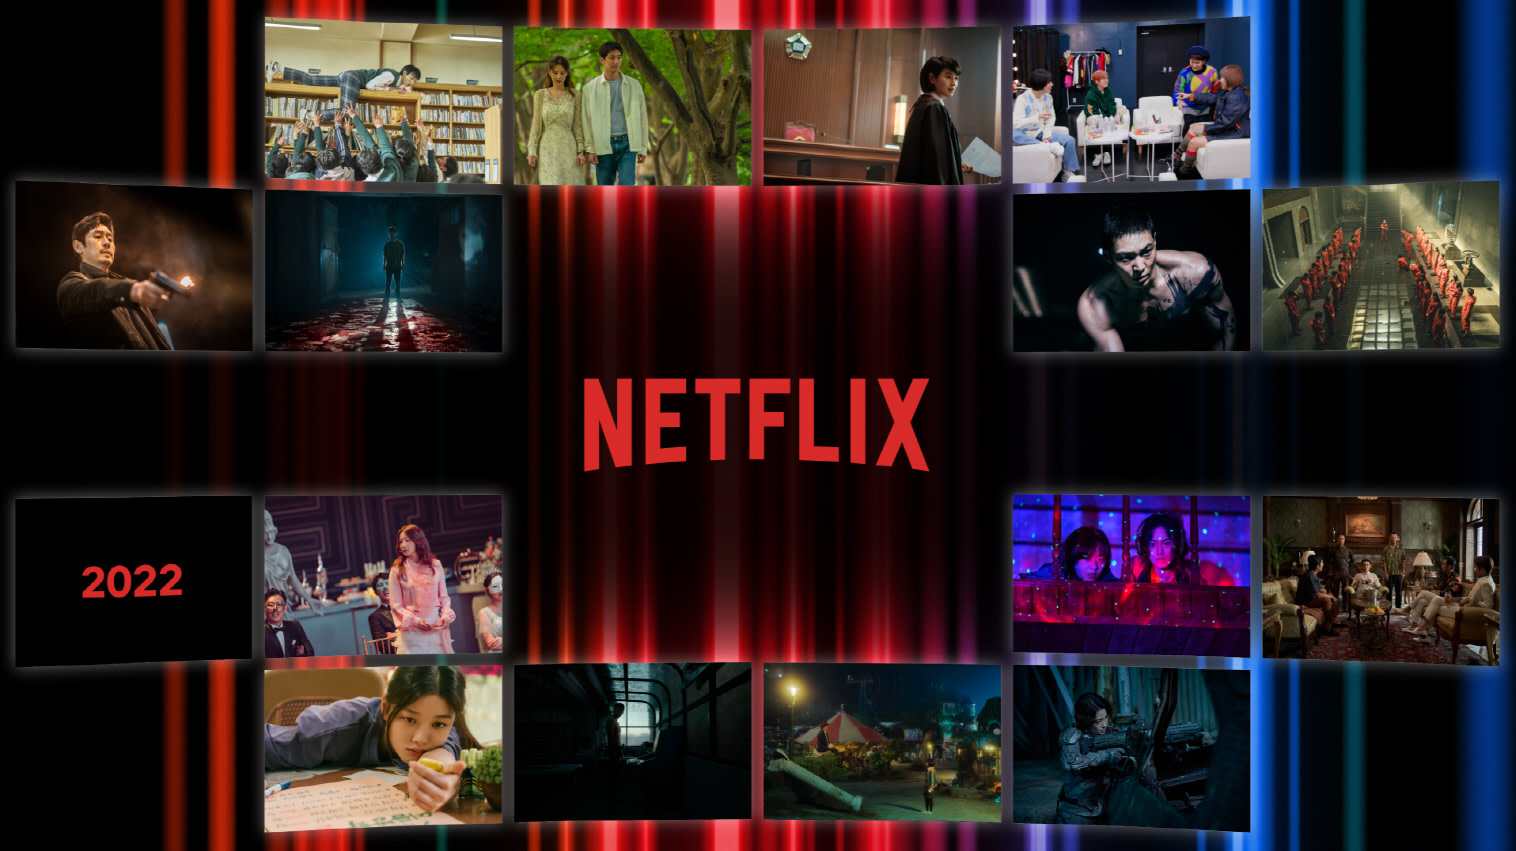  


The objective of this project is to analyze and cluster a dataset related to Netflix. **The dataset consists of various attributes associated with Netflix shows and movies, such as title, genre, release year, duration, rating, and others. The aim is to explore patterns and similarities among the content available on the platform and group them into meaningful clusters.**

Next, exploratory data analysis (EDA) techniques will be utilized to gain insights into the dataset. **Visualizations and statistical summaries will be used to understand the distribution of variables, identify any trends, and explore relationships between different features.**

Once the dataset has been thoroughly analyzed, clustering algorithms such as k-means, hierarchical clustering, or density-based spatial clustering will be employed. These algorithms will group similar Netflix shows and movies together based on their attributes. **The optimal number of clusters will be determined using techniques like the elbow method or silhouette analysis.**

After the clustering process, the results will be evaluated and interpreted. The clusters will be analyzed to understand the common characteristics and patterns within each group. **This analysis will provide valuable information for Netflix in terms of content categorization, recommendation systems, and content acquisition strategies.**

Finally, the findings and insights from the clustering analysis will be summarized and presented in a clear and concise manner. Visualizations, charts, and graphs will be used to effectively communicate the outcomes of the project. Recommendations may also be provided based on the identified clusters, suggesting potential improvements or strategies for Netflix to enhance user experience and content offerings.

# **GitHub Link -**

http://surl.li/nwtfh


# **Problem Statement**


**Write Problem Statement Here.**

**Netflix is the world's largest online streaming service provider,
with over 238.4 million subscriber as of Q2 2023.** It is cricial that they effectively cluster the shows that are hosted on their platform in order to enhance the user experience, thereby preventing subscriber churn.


**We will be able to understand the shows that are similar to and different from one another by creating clusters, which may be leveraged to offer the consumers personalized show suggestion depending on their prefrences.**


The goal of this project is to classify/group the Netflix shows into certain clusters such that the showa within a cluster are similar to each other an dthe shows in different cluster are dissimilar to each other.


















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as po
import plotly.io as pio

from collections import Counter
from sklearn import preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
netflix_df = pd.read_csv('/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [3]:
# Dataset First Look
netflix_df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [4]:
netflix_df.tail()

show_id     type                                    title     director  \
7782   s7783    Movie                                     Zozo  Josef Fares   
7783   s7784    Movie                                   Zubaan  Mozez Singh   
7784   s7785    Movie                        Zulu Man in Japan          NaN   
7785   s7786  TV Show                    Zumbo's Just Desserts          NaN   
7786   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS     Sam Dunn   

                                                   cast  \
7782  Imad Creidi, Antoinette Turk, Elias Gergi, Car...   
7783  Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...   
7784                                            Nasty C   
7785                         Adriano Zumbo, Rachel Khoo   
7786                                                NaN   

                                                country          date_added  \
7782  Sweden, Czech Republic, United Kingdom, Denmar...    October 19, 2020   
7783                                              India       March 2, 2019   
7784                                                NaN  September 25, 2020   
7785                                          Australia    October 31, 2020   
7786              United Kingdom, Canada, United States       March 1, 2020   

      release_year rating  duration  \
7782          2005  TV-MA    99 min   
7783          2015  TV-14   111 min   
7784          2019  TV-MA    44 min   
7785          2019  TV-PG  1 Season   
7786          2019  TV-MA    90 min   

                                              listed_in  \
7782                       Dramas, International Movies   
7783     Dramas, International Movies, Music & Musicals   
7784  Documentaries, International Movies, Music & M...   
7785                 International TV Shows, Reality TV   
7786                    Documentaries, Music & Musicals   

                                            description  
7782  When Lebanon's Civil War deprives Zozo of his ...  
7783  A scrappy but poor boy worms his way into a ty...  
7784  In this documentary, South African rapper Nast...  
7785  Dessert wizard Adriano Zumbo looks for the nex...  
7786  This documentary delves into the mystique behi...

### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
netflix_df.shape

(7787, 12)

In [6]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

### Dataset Information

In [7]:
# Dataset Info
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
netflix_df.duplicated().sum()

0

#### Missing Values/Null Values

<Axes: >

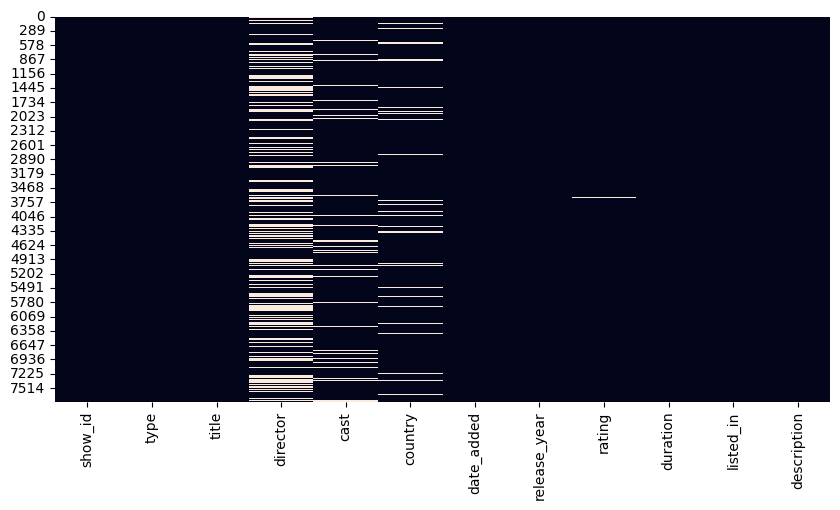

In [9]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(netflix_df.isnull(), cbar=False)

In [10]:
# Missing Values/Null Values Count
netflix_df.isna().sum().sort_values(ascending = False)

director        2389
cast             718
country          507
date_added        10
rating             7
show_id            0
type               0
title              0
release_year       0
duration           0
listed_in          0
description        0
dtype: int64

As we can see director, cast, country, date_added, rating contains missing values


In [11]:
#total null values in the netflix Dataset
netflix_df.isnull().sum().sum()

3631

In [12]:
# Checking the unique values in each attribute of the dataset
netflix_df.nunique()

show_id         7787
type               2
title           7787
director        4049
cast            6831
country          681
date_added      1565
release_year      73
rating            14
duration         216
listed_in        492
description     7769
dtype: int64

In [13]:
# Handling the missing values
# For the columns 'director', 'cast', and 'country', fill missing values with 'Unknown'
netflix_df[['director','cast','country']] = netflix_df[['director','cast','country']].fillna('Unknown')

# For the 'rating' column, fill missing values with the mode (most frequent value) of the 'rating' column
netflix_df['rating'] = netflix_df['rating'].fillna(netflix_df['rating'].mode()[0])

# Drop rows with any remaining missing values
netflix_df.dropna(axis=0, inplace = True)

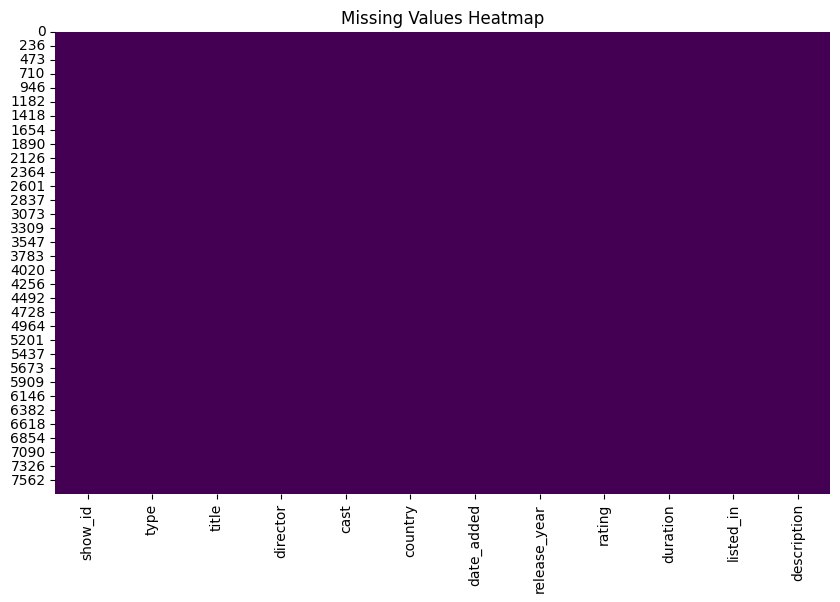

In [14]:
# Create a missing value heatmap
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.heatmap(netflix_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [15]:
netflix_df.shape

(7777, 12)

### **What did you know about your dataset?**

**Answer Here**

This dataset  contain information about various TV shows and movies available on Netflix, including details like the production country, release year, rating, duration, genre, and a description of each title. It consists of 12 columns and 7787 rows.

## ***2. Understanding Your Variables***

In [16]:
# Dataset Columns
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [17]:
# Dataset Describe
netflix_df.describe(include='all')

show_id   type title director     cast        country       date_added  \
count     7777   7777  7777     7777     7777           7777             7777   
unique    7777      2  7777     4050     6822            682             1565   
top         s1  Movie    3%  Unknown  Unknown  United States  January 1, 2020   
freq         1   5377     1     2379      718           2549              118   
mean       NaN    NaN   NaN      NaN      NaN            NaN              NaN   
std        NaN    NaN   NaN      NaN      NaN            NaN              NaN   
min        NaN    NaN   NaN      NaN      NaN            NaN              NaN   
25%        NaN    NaN   NaN      NaN      NaN            NaN              NaN   
50%        NaN    NaN   NaN      NaN      NaN            NaN              NaN   
75%        NaN    NaN   NaN      NaN      NaN            NaN              NaN   
max        NaN    NaN   NaN      NaN      NaN            NaN              NaN   

        release_year rating  duration      listed_in  \
count    7777.000000   7777      7777           7777   
unique           NaN     14       216            491   
top              NaN  TV-MA  1 Season  Documentaries   
freq             NaN   2868      1608            334   
mean     2013.935965    NaN       NaN            NaN   
std         8.760694    NaN       NaN            NaN   
min      1925.000000    NaN       NaN            NaN   
25%      2013.000000    NaN       NaN            NaN   
50%      2017.000000    NaN       NaN            NaN   
75%      2018.000000    NaN       NaN            NaN   
max      2021.000000    NaN       NaN            NaN   

                                              description  
count                                                7777  
unique                                               7759  
top     Multiple women report their husbands as missin...  
freq                                                    3  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%                                                   NaN  
max                                                   NaN

### Variables Description

**Attribute Information**

**show_id :** Unique ID for every Movie / Tv Show

**type :** Identifier - A Movie or TV Show

**title :** Title of the Movie / Tv Show

**director :** Director of the Movie

**cast :** Actors involved in the movie / show

**country :** Country where the movie / show was produced

**date_added :** Date it was added on Netflix

**release_year :** Actual Releaseyear of the movie / show

**rating :** TV Rating of the movie / show

**duration :** Total Duration - in minutes or number of seasons

**listed_in :** Genere

**description:** The Summary description

### Check Unique Values for each variable.

In [18]:
# Check Unique Values for each variable.
print(netflix_df.apply(lambda col: col.unique()))

show_id         [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...
type                                             [TV Show, Movie]
title           [3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19...
director        [Unknown, Jorge Michel Grau, Gilbert Chan, Sha...
cast            [João Miguel, Bianca Comparato, Michel Gomes, ...
country         [Brazil, Mexico, Singapore, United States, Tur...
date_added      [August 14, 2020, December 23, 2016, December ...
release_year    [2020, 2016, 2011, 2009, 2008, 2019, 1997, 201...
rating          [TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y...
duration        [4 Seasons, 93 min, 78 min, 80 min, 123 min, 1...
listed_in       [International TV Shows, TV Dramas, TV Sci-Fi ...
description     [In a future where the elite inhabit an island...
dtype: object


## 3. ***Data Wrangling***

In [19]:
# Write your code to make your dataset analysis ready.
# Create new features to store date, day, month and year seperately.
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])  # First convert date_added to date time format.
netflix_df['day_added'] = netflix_df['date_added'].dt.day            # Compute day.
netflix_df['year_added'] = netflix_df['date_added'].dt.year          # Compute year.
netflix_df['month_added'] = netflix_df['date_added'].dt.month        # Compute month.

### **What all manipulations have you done and insights you found?**

**Answer Here.**


We can gather the following insights from the dataset:

**Director:** There are missing values in the "Director" column.

**Country:** There are missing values in the "Country" column, which have been filled with zero.

**Cast:** There are missing values in the "Cast" column, which have been filled with "No cast."

**Date Added:** There are missing values in the "Date Added" column.

 **Duplicated entries have been identified in the dataset,sum is zero.Unique Values also in  each column has to find unique items from different columns.**

**Date_addded Column:** In the "Date Added" column, additional information has been extracted such as the day, month, and year.

**In summary, the dataset contains missing values in the director, country, cast, and date added columns. The missing values in the cast column have been filled with "No cast," and the missing values in the country column have been filled with zero. Duplicated entries have been identified, and the sum of values in one column is zero.** Each column has different unique values. Additionally, the date added column has been parsed to extract the day, month, and year.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

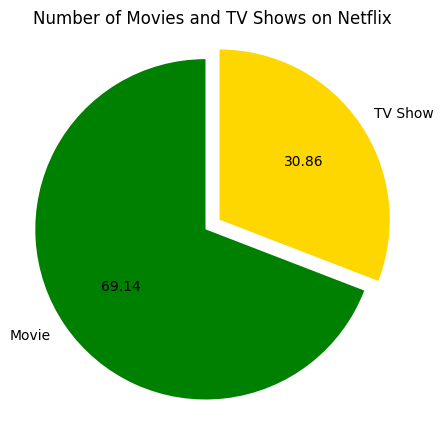

In [21]:
# Chart - 1 visualization code

# Group data by 'type' and get the count of each type
type_of_content = netflix_df['type'].value_counts()

#  colors
colors = ['#008000', '#ffd700']

explode = (0, 0.1)

# Create a pie chart
plt.figure(figsize=(5, 5))
plt.pie(type_of_content, labels=type_of_content.index, autopct='%.2f', colors=colors, explode=explode, startangle=90)

plt.axis('equal')

# Set title
plt.title('Number of Movies and TV Shows on Netflix')

# show th chart
plt.show()


##### **1. Why did you pick the specific chart?**

**Answer Here.**

The specific chart used in the code is a pie chart. I picked this chart because it is effective in visualizing the distribution of categorical data. In this case, the chart is used to represent the types of content watched on Netflix, which are categorized as "TV Show" and "Movie."

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

TV shows constitute the majority, accounting for 69.1% of the content watched on Netflix, while movies make up a smaller percentage of 30.9%.


##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

The data indicates a clear preference for TV shows over movies, with a significantly higher percentage of 69.1% compared to the lower percentage of 30.9% for movies. This suggests that people tend to enjoy shorter formats like TV shows rather than investing their time in longer movies that may be less engaging.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

# Create a DataFrame to store month values and counts
months_df = pd.DataFrame(netflix_df['month_added'].value_counts())

# Reset the index to create a "month" column
months_df.reset_index(inplace=True)

# Rename the columns to "month" and "count"
months_df.rename(columns={'index': 'month', 'month_added': 'count'}, inplace=True)

In [ ]:
fig = px.bar(months_df, x="month", y="count", text_auto=True, color='count', color_continuous_scale=['#0000FF', '#FFFF00'])
fig.update_layout(
    title={
        'text': 'Month wise Addition of Movies and TV Shows on Netflix',
        'y':0.95,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        autosize=False,
        width=1000,
        height=500,
        showlegend=True)
# fig.show()
fig.show()

##### **1. Why did you pick the specific chart?**

**Answer here**

The bar chart is suitable for comparing and displaying categorical data (months) and their corresponding counts. The chart helps in understanding the distribution of content additions across different months and identifying any patterns or trends.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

During the months of October to December, there is a noticeable surge in the number of TV shows and movies being released on the Netflix platform.The months of October to December are known for having various holidays and celebrations, such as Halloween, Diwali and Christmas, which often result in people spending more time at home and seeking entertainment options

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

The gained insights regarding the increase in TV shows and movies on the Netflix platform during the months of October to December can potentially create a positive business impact.

#### Chart - 3

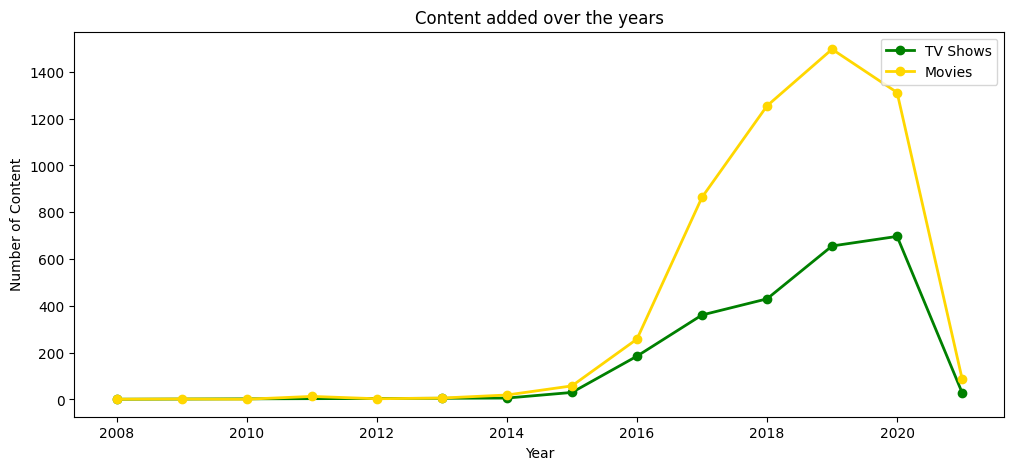

In [20]:
# Chart - 3 visualization code


tv_show = netflix_df[netflix_df["type"] == "TV Show"]
movie = netflix_df[netflix_df["type"] == "Movie"]

col = "year_added"

content_1 = tv_show["year_added"].value_counts().sort_index()
content_2 = movie["year_added"].value_counts().sort_index()

# Create a line chart
plt.figure(figsize=(12, 5))

plt.plot(content_1.index, content_1.values, label="TV Shows", color='#008000', marker='o', linestyle='-', linewidth=2)
plt.plot(content_2.index, content_2.values, label="Movies", color='#ffd700', marker='o', linestyle='-', linewidth=2)

# Customize the plot
plt.title("Content added over the years")
plt.xlabel("Year")
plt.ylabel("Number of Content")
plt.legend(loc='upper right')

# Display the chart
plt.show()

##### **1. Why did you pick the specific chart?**

**Answer Here.**

The line chart is suitable for showing the trend and distribution of data over a continuous axis (in this case, the years). It allows for easy comparison between the two categories (TV shows and movies) and how their counts vary over time.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

The trend in the visualization indicates that between 2008 and 2022, there were relatively fewer TV shows and movies added to Netflix. However, starting from 2016, there was a slight increase in content additions. In 2019, there was a significant peak in the number of movies added, while TV shows experienced a similar trend but with a lesser increase compared to movies.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

The gained insights indicate a positive impact for Netflix as the demand for both TV shows and movies on the platform has been increasing rapidly over the years. This growth presents an opportunity for Netflix to provide more high-quality content to its users, thereby enhancing user satisfaction and engagement.

#### Chart - 4

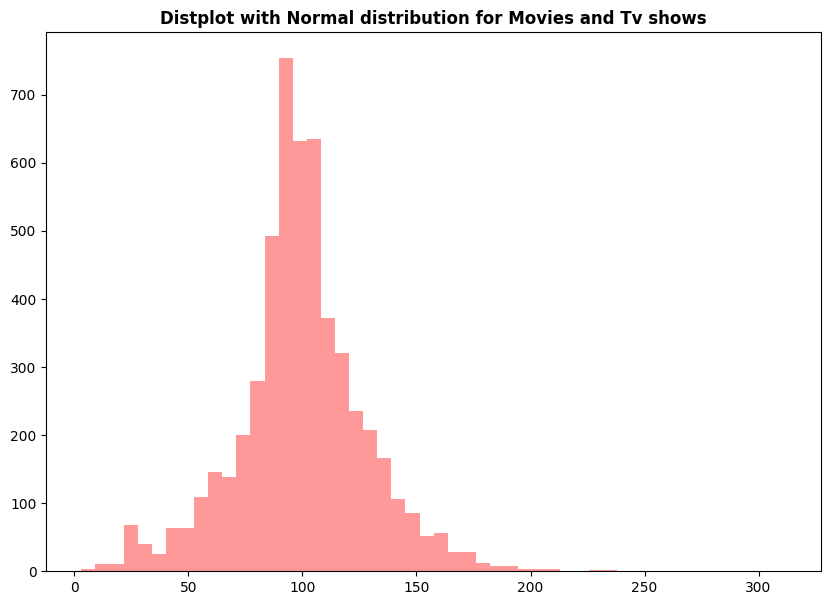

In [ ]:
# Chart - 4 visualization code
#Checking the distribution of Movie Durations

plt.figure(figsize=(10,7))
#Regular Expression pattern \d is a regex pattern for digit + is a regex pattern for at leas
sns.distplot(movie['duration'].str.extract('(\d+)'),kde=False, color=['red'])
plt.title('Distplot with Normal distribution for Movies and Tv shows',fontweight="bold")
plt.show()

##### **1. Why did you pick the specific chart?**

**Answer Here**

The Distplot is a suitable choice for this analysis because it allows us to observe the frequency or count of movies falling into different duration ranges.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

The average length of movies and TV shows falling within the range of 50 to 150 minutes can vary depending on the specific content available on Netflix.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

**Positive Business Impact:**

1-**Audience Flexibility :** By offering movies and TV shows with a variety of lengths, ranging from shorter films to longer epic productions, Netflix can cater to the diverse preferences and schedules of its audience

2-**Increased Engagement :** Movies and TV shows with varying lengths provide options for viewers to choose content that fits their available time. This can lead to increased engagement and longer viewing sessions

3-**Content Diversity :** By including movies and TV shows of different lengths, Netflix can expand its content library and cater to various genres and storytelling formats.

#### Chart - 5

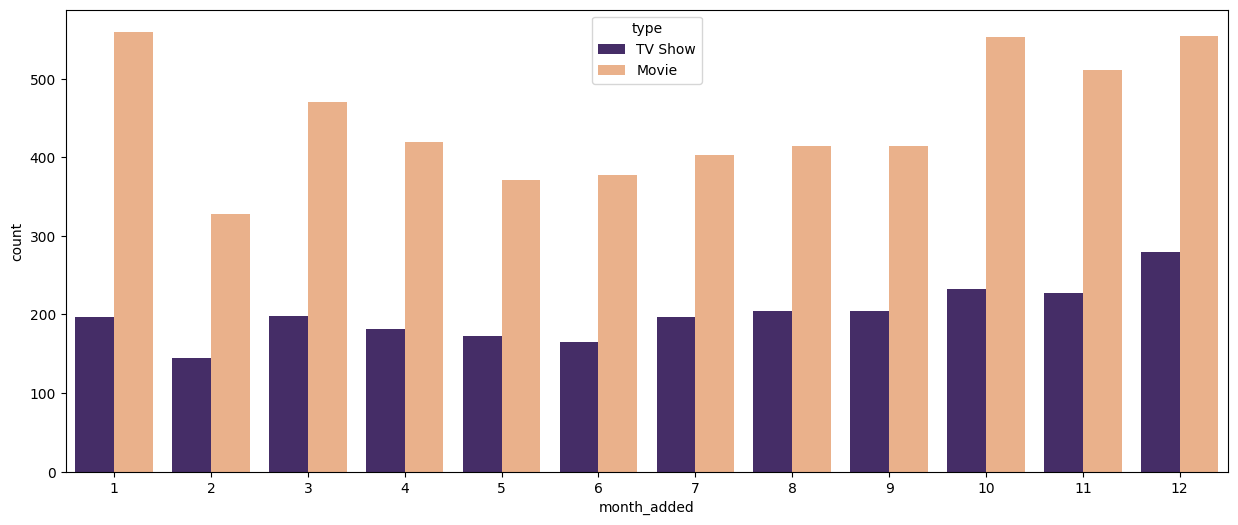

In [ ]:
# Chart - 5 visualization code
import matplotlib.pyplot as plt   # Matplotlib for plotting
import seaborn as sns             # Seaborn for data visualization

# Create a new figure and axes with specified size
fig, ax = plt.subplots(figsize=(15,6))
sns.countplot(x='month_added', hue='type',lw=5, data=netflix_df, ax=ax,palette=['#432371' ,'#FAAE7B'])

plt.show()

##### **1. Why did you pick the specific chart?**



**Answer Here.**

By using a countplot, we can easily see and compare the frequencies of TV show and movie additions for each month.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

**Movies:**

January, October, and December appear to be the trending months for movie additions on Netflix compared to other months.

**Tv Shows:**

October, November, and December emerge as the trending months for TV show additions on Netflix compared to other months.


##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

The gained insights regarding the trending months for movies and TV shows on Netflix can potentially create a positive business impact. Here's why:

**1-Meeting Viewer Demand:**

**2-Capitalizing on Seasonal Trends:**

**3-Improved Competitiveness:**

#### Chart - 6

<Axes: title={'center': 'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

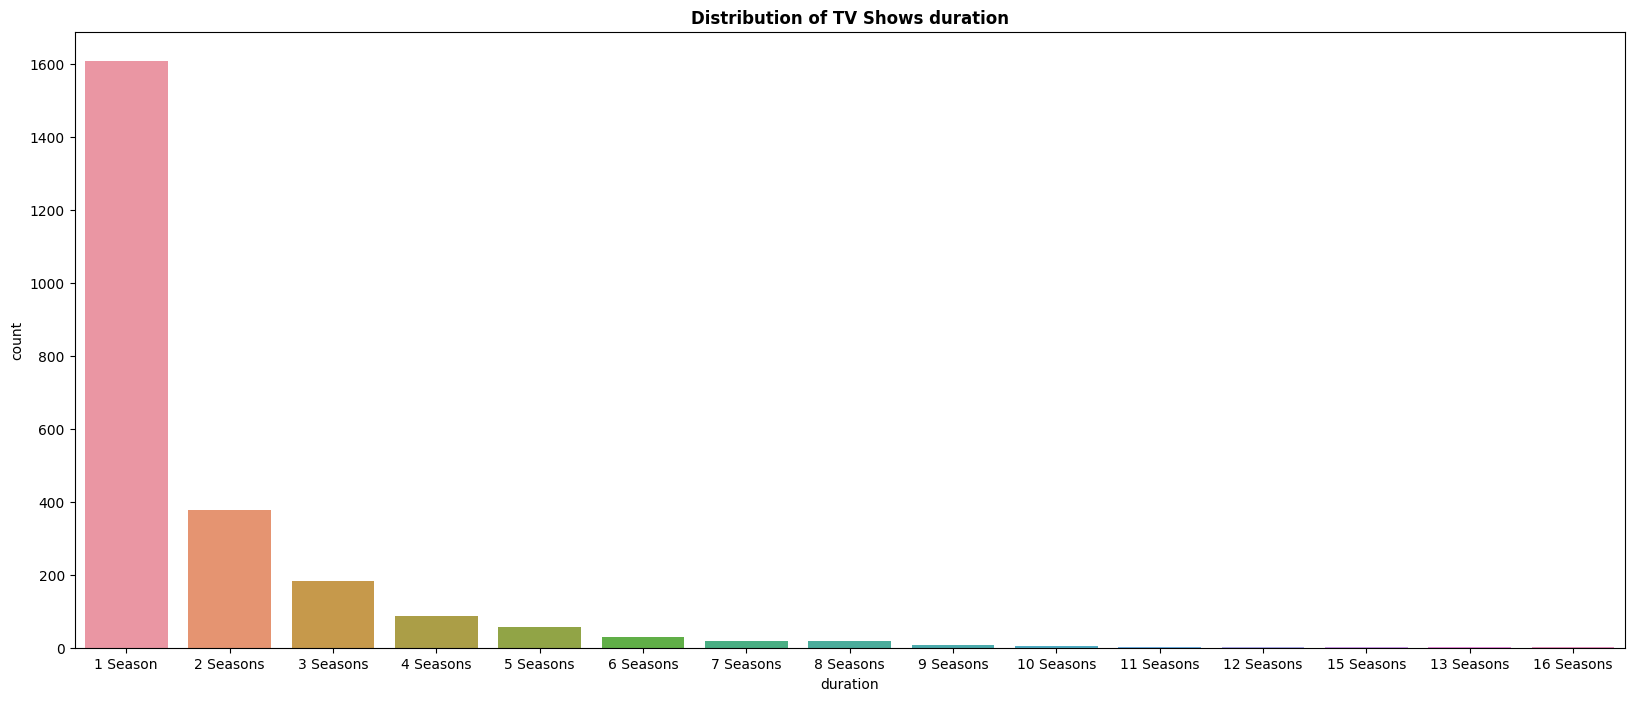

In [ ]:
# Chart - 6 visualization code
#Checking the distribution of TV SHOWS

plt.figure(figsize=(20,8))
plt.title("Distribution of TV Shows duration",fontweight='bold')
sns.countplot(x=tv_show['duration'],data=tv_show,order = tv_show['duration'].value_counts().index)

##### **1. Why did you pick the specific chart?**

**Answer Here.**

The chart in question is a countplot, which is a type of bar chart that shows the frequency or count of each category in a categorical variable. It seems to be used to display the distribution of TV show seasons

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

From the chart, we observed that the majority of TV shows or web series in the dataset have only one season, while the remaining shows have a maximum of two, three, four, or five seasons.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

Yes ,Positive Impact because by recognizing that the majority of TV shows have a limited number of seasons, content producers and streaming platforms can optimize their production planning. They can allocate resources more efficiently, reduce production costs, and potentially increase the output of content.

#### Chart - 7

([<matplotlib.patches.Wedge at 0x7ad2d8fd9ed0>,
 [Text(-0.8902585632950727, -0.6460957285726268, 'Others'),
  Text(0.9711911599582614, 0.7048317038974106, 'Originals')],
 [Text(-0.4855955799791305, -0.3524158519487055, '69.98%'),
  Text(0.5665281766423191, 0.4111518272734894, '30.02%')])

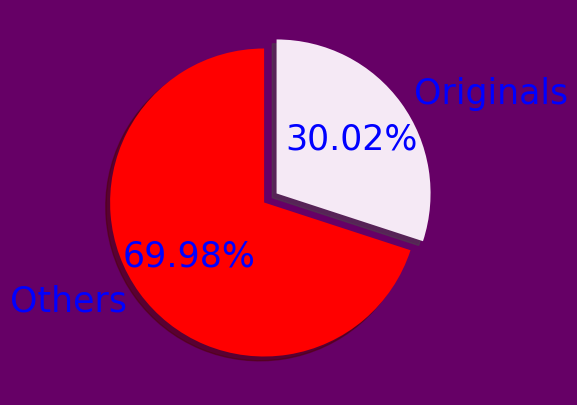

In [ ]:
# Chart - 7 visualization code

movie['originals'] = np.where(movie['release_year'] == movie['year_added'], 'Yes', 'No')

# pie plot showing percentage of originals and others in movies

fig, ax = plt.subplots(figsize=(5,5),facecolor="#660066")
ax.patch.set_facecolor("#660066")
explode = (0, 0.1)


ax.pie(movie['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"blue", 'fontsize': 25}, colors =['red','#F5E9F5'])

##### **1. Why did you pick the specific chart?**

**Answer Here.**

The pie plot is a suitable choice for visualizing the distribution of categorical data, such as the proportion of "originals" and "others" in this case. It allows you to see the relative sizes of each category as a portion of the whole.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

Out of the movies available on Netflix, 30% are Netflix originals, while the remaining 70% are movies that were released earlier through different distribution channels and subsequently added to the Netflix

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

Yes, gaining insights can indeed help create a positive business impact. By understanding the distribution of movies on Netflix, such as the proportion of Netflix originals versus non-originals, the streaming service can make informed decisions about content acquisition and production.

#### Chart - 8

In [ ]:
netflix_df['cast']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                              Unknown
Name: cast, Length: 7777, dtype: object

In [ ]:
# seperating actors from cast column
cast = netflix_df['cast'].str.split(', ', expand=True).stack()

# top actors name who play highest role in movie/show.
cast.value_counts()

Unknown             718
Anupam Kher          42
Shah Rukh Khan       35
Naseeruddin Shah     30
Om Puri              30
                   ... 
Lorenz Martinez       1
Art Acuña             1
Archie Alemania       1
Demore Barnes         1
Rachel Khoo           1
Length: 32848, dtype: int64

In [ ]:
cast =cast[cast != 'Unknown ']


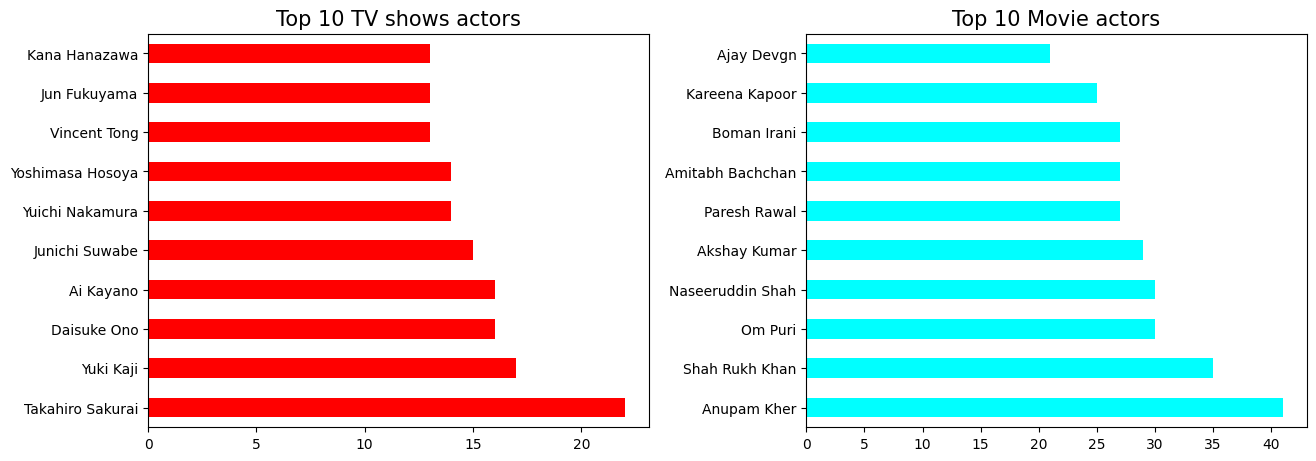

In [ ]:
# Chart - 8 visualization code

fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = netflix_df[netflix_df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
top_TVshows_actor =top_TVshows_actor[top_TVshows_actor != 'Unknown']


# plotting actor who appeared in highest number of TV Show

a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0],color='red')
a.set_title('Top 10 TV shows actors', size=15)


# seperating movie actor from cast column

top_movie_actor = netflix_df[netflix_df['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
top_movie_actor =top_movie_actor[top_movie_actor != 'Unknown']


# plotting actor who appeared in highest number of Movie

b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1],color='Cyan')
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

##### **1. Why did you pick the specific chart?**




**Answer Here.**

The horizontal orientation of the bars allows for easier reading and comparison of the values. The length of each bar represents the number of TV shows or movies an actor has appeared in. The chart also includes titles and is divided into two subplots, making it clear that one subplot represents TV shows and the other represents movies.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

In the TV shows category, the actor with the highest appearance is Takahiro Sakurai. In the movies category, the actor with the highest appearance is Anupam Kher

#### Chart - 9

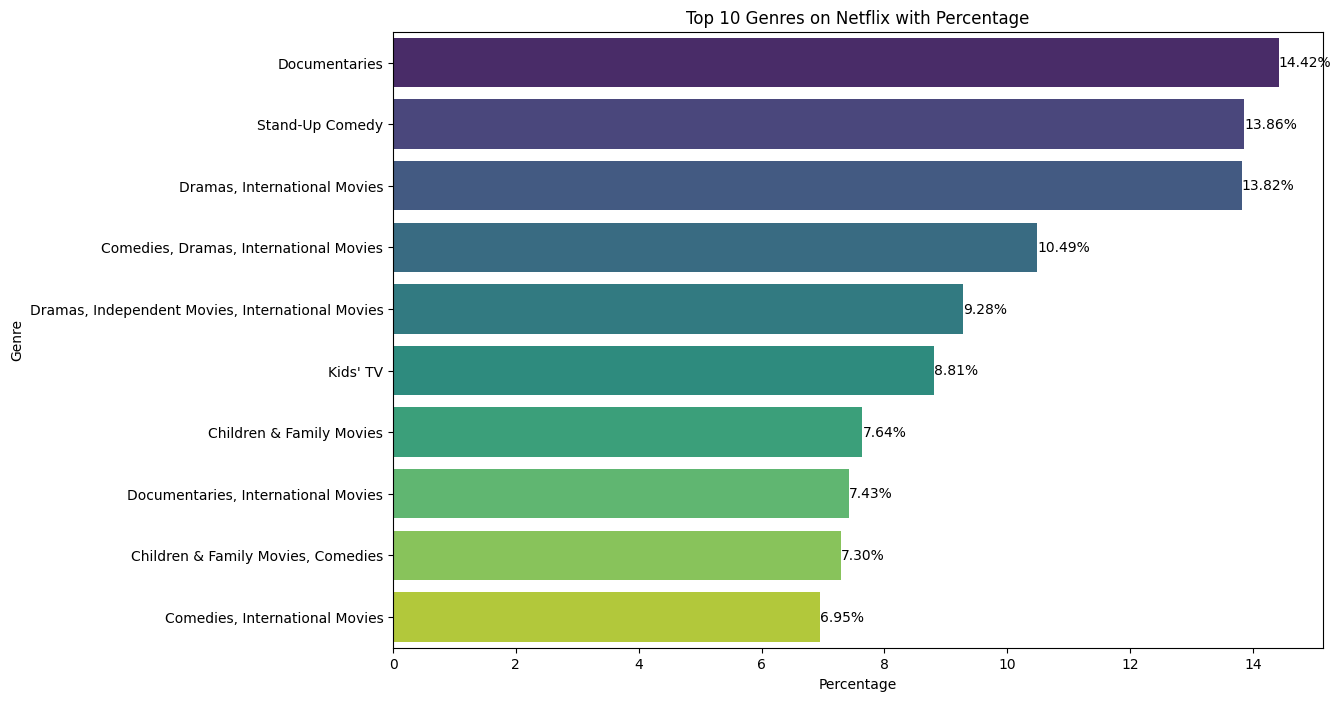

In [23]:
# Chart - 9 visualization
# Calculate the top 10 genres from the 'listed_in' column and their counts
top_10_genre = netflix_df['listed_in'].value_counts().head(10)

# Calculate percentage values
total_count = top_10_genre.sum()
percentage_values = (top_10_genre / total_count) * 100

# Create a horizontal bar chart
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x=percentage_values.values, y=top_10_genre.index, palette="viridis")

# Annotate percentage values on the bars
for index, value in enumerate(percentage_values):
    barplot.text(value, index, f'{value:.2f}%', va='center', fontsize=10, color='black')

# Set title and labels
plt.title('Top 10 Genres on Netflix with Percentage')
plt.xlabel('Percentage')
plt.ylabel('Genre')

# Display the chart
plt.show()


##### **1. Why did you pick the specific chart?**

**Answer Here.**

The pie chart's circular shape allows viewers to quickly compare the sizes of different genres by observing the relative areas of the slices. The accompanying labels and percentage values outside the slices provide additional information and enhance the readability of the chart.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

In this chart, the top three genres on Netflix based on their distribution are:

1-**Documentaries:** 14.4%

2-**Stand-up Comedy:** 13.9%

3-**Drama, International Movies:**1 3.8%

These genres have the highest percentages compared to the other genres included in the top 10 list.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

The gained insights from analyzing the distribution of genres on Netflix can potentially help create a positive business impact in several ways

1-**Content Curation :** By focusing on genres that have high viewer demand, Netflix can ensure that it offers a diverse and appealing selection of movies and shows to its subscribers

2-**Targeted Acquisitions and Productions :** It can guide them in identifying genres that are in high demand and have a proven audience. This can optimize their investments in content creation and acquisition

3-**Personalized Recommendations:** Personalized recommendations for individual users, improving their overall experience and encouraging them to spend more time on the platform.


#### Chart - 10

In [ ]:
# number of unique values
netflix_df['release_year'].nunique()

73

In [ ]:
# Print the oldest and latest release years in the 'netflix_df'

print(f'Oldest release year : {netflix_df.release_year.min()}')
print(f'Latest release year : {netflix_df.release_year.max()}')

Oldest release year : 1925
Latest release year : 2021


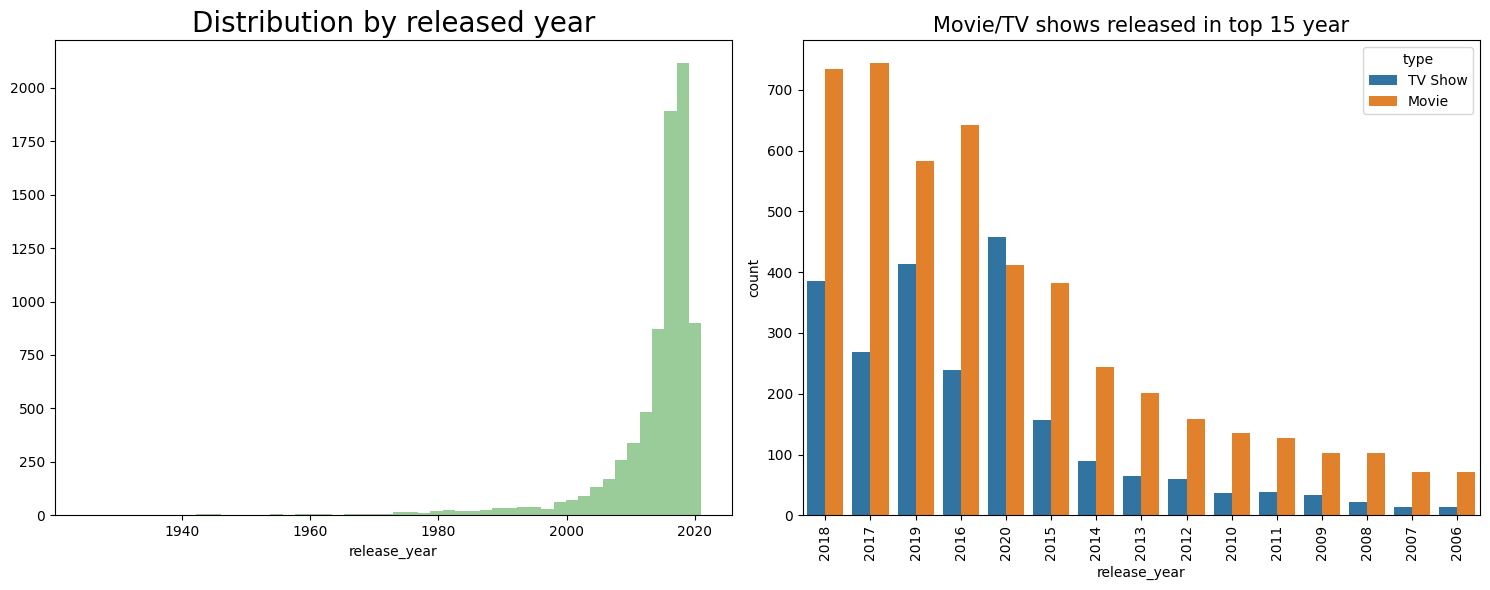

In [ ]:
# Chart - 10 visualization code

fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
# Create a histogram of the 'release_year'
hist = sns.distplot(netflix_df['release_year'], ax=ax[0], kde=False,color='green')
hist.set_title('Distribution by released year', size=20)

# Bivariate analysis
# Create a countplot of 'release_year'
count = sns.countplot(x="release_year", hue='type', data=netflix_df, order=netflix_df['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#####** 1. Why did you pick the specific chart?**

**Answer Here.**

The chosen chart combination of a histogram and a grouped bar plot allows for both univariate and bivariate analysis. The histogram provides an overview of the distribution of movie release years, while the bar plot allows for a comparison of the number of movies and TV shows released in the top 15 years.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

The distribution of release years in the histogram shows a general trend of movies being released on Netflix starting from around 1980. The number of releases gradually increases, with significant growth observed from the year 2000 onwards. The highest peak in the distribution is observed between 2010 and 2020, indicating a high number of Movie/Tv shows releases during that period.

In terms of content type (Movies, TV shows), the bar graph highlights that 2017 and 2020 demonstrate the highest trends. These years exhibit a significant number of movie releases, TV show releases, and a combination of both on Netflix.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

Yes, the gained insights can help create a positive business impact. By understanding the distribution of release years and identifying trends, businesses can make informed decisions regarding content acquisition, production, and marketing strategies.

**Variables Description- Rating**

- **TV-Y**: This rating means that the content is appropriate for all children. It is aimed at children aged 2-6 and may include educational programming.

- **TV-Y7**: This rating means that the content is appropriate for children aged 7 and up. It may contain mild violence, comic mischief, or scary content that may not be suitable for younger children.

- **TV-Y7-FV:** This rating means that the content is appropriate for children aged 7 and up, but may contain more intense violence. The "FV" stands for "fantasy violence".

- **TV-G:** This rating means that the content is appropriate for all ages. It may contain mild language or violence, but nothing too intense.

- **TV-PG:** This rating means that parental guidance is suggested. The content may contain material that parents might find inappropriate for younger children. It may include mild to moderate language, violence, or suggestive content.

- **TV-14:** This rating means that the content is appropriate for viewers aged 14 and up. It may include intense violence, strong language, or sexual situations.

- **TV-MA:** This rating means that the content is intended for mature audiences only. It may include graphic violence, explicit sexual content, or strong language.

- **G**- This rating means that the content is appropriate for all ages. It is usually intended for young children and may include animated or family-friendly content.

- **PG:** This rating means that parental guidance is suggested. The content may include mild violence, language, or suggestive themes.

- **PG-13:**This rating means that the content is appropriate for teens aged 13 and up. It may include intense violence, language, or suggestive content.

- **R:** This rating means that the content is intended for adults. It may include graphic violence, strong language, or nudity.

- **NC-17:** This rating means that the content is intended for mature audiences only and may contain explicit sexual content or violence that is not suitable for minors.

- **NR:** This rating means that no rating has been assigned yet or that the content is not rated by a particular board.

#### Chart - 11

In [ ]:
#Ratings
# number of unique values
netflix_df.rating.nunique()

14

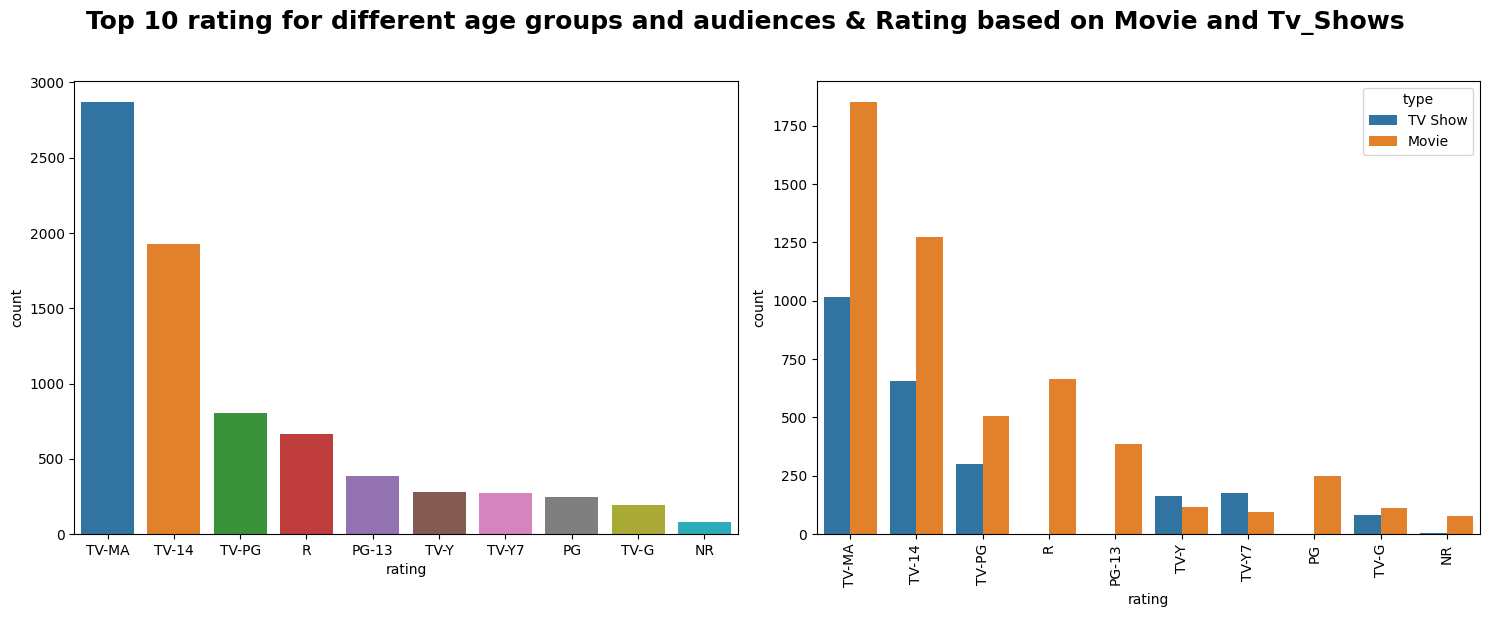

In [ ]:
# Chart - 11 visualization code
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating for different age groups and audiences & Rating based on Movie and Tv_Shows',
             weight='bold', y=1.02, size=18)

# univariate analysis
# Create a countplot of movie ratings ('rating') for Netflix movies.
sns.countplot(x="rating", data=netflix_df, order=netflix_df['rating'].value_counts().index[0:10], ax=ax[0])



# bivariate analysis
graph = sns.countplot(x="rating", data=netflix_df, hue='type', order=netflix_df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


##### **1. Why did you pick the specific chart?**

**Answer Here.**

The chosen chart combination of two count plots allows for both univariate and bivariate analysis. The first plot provides insights into the top 10 ratings across all content, while the second plot offers a comparison of ratings specifically for movies and TV shows.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

**TV-MA:** This rating means that the content is intended for mature audiences only. It may include graphic violence, explicit sexual content, or strong language

In terms of ratings, the most common rating is **TV-MA**, which applies to both movies and TV shows.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

**Answer Here**

The insight that **TV-MA** is the most common rating for both movies and TV shows can inform content strategies, audience targeting, programming decisions, and content diversity to drive positive business impact in terms of increased viewership and customer satisfaction

#### Chart - 12

In [ ]:
# Chart - 13 visualization code

# Create a DataFrame with director counts
directors_list = netflix_df.director.value_counts().reset_index().head(15)[1:]
directors_list.rename(columns={'index':'Directors name', 'director':'Count'}, inplace=True)

# Create a bar chart using Plotly
fig = px.bar(directors_list, x='Directors name', y='Count', text_auto=True)

# Generate a list of 25 unique color codes using seaborn
color_palette = sns.color_palette('bright', n_colors=15).as_hex()
fig.update_traces(marker_color=color_palette)

# Add a title and adjust the layout
fig.update_layout(
    title={
        'text': 'Top 25 directors with highest number of Movies and Tv Shows.',
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
    autosize=False,
    width=1200,
    height=500
)

# Show the plot
fig.show()


In [ ]:
directors_list

Directors name  Count
1   Raúl Campos, Jan Suter     18
2             Marcus Raboy     16
3                Jay Karas     14
4      Cathy Garcia-Molina     13
5              Jay Chapman     12
6          Youssef Chahine     12
7          Martin Scorsese     12
8         Steven Spielberg     10
9             David Dhawan      9
10             Lance Bangs      8
11              Johnnie To      8
12         Shannon Hartman      8
13        Robert Rodriguez      8
14       Quentin Tarantino      8

##### **1. Why did you pick the specific chart?**

**Answer here.**

The chosen chart effectively presents the data in an intuitive and visually appealing manner, allowing viewers to easily identify the directors with the most contributions on Netflix

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

The directors Raúl Campos and Jan Suter have the highest count in terms of overall Movies and TV shows on Netflix.

#### Chart - 13 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
netflix_df['target_ages'] = netflix_df['rating'].replace(ratings)

In [ ]:
# Preparing data for heatmap
netflix_df['count'] = 1

# Group the data by 'country', sum the 'count' values, and select the top 10 countries
data = netflix_df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
# Extract the 'country' column from the result
data = data['country']

#Filtering Data for Heatmap:
df_heatmap = netflix_df.loc[netflix_df['country'].isin(data)]

# Compute a cross-tabulation (crosstab) of 'country' and 'target_ages' and normalize it along the index
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

country        Canada     Egypt    France     India     Japan  South Korea  \
target_ages                                                                  
Adults       0.446328  0.277228  0.678261  0.255688  0.368889     0.469945   
Kids         0.180791  0.000000  0.095652  0.016251  0.008889     0.027322   
Older Kids   0.225989  0.039604  0.060870  0.160347  0.271111     0.120219   
Teens        0.146893  0.683168  0.165217  0.567714  0.351111     0.382514   

country         Spain  United Kingdom  United States   Unknown  
target_ages                                                     
Adults       0.835821        0.512626       0.502942  0.320158  
Kids         0.022388        0.093434       0.073362  0.169960  
Older Kids   0.044776        0.204545       0.187132  0.235178  
Teens        0.097015        0.189394       0.236563  0.274704

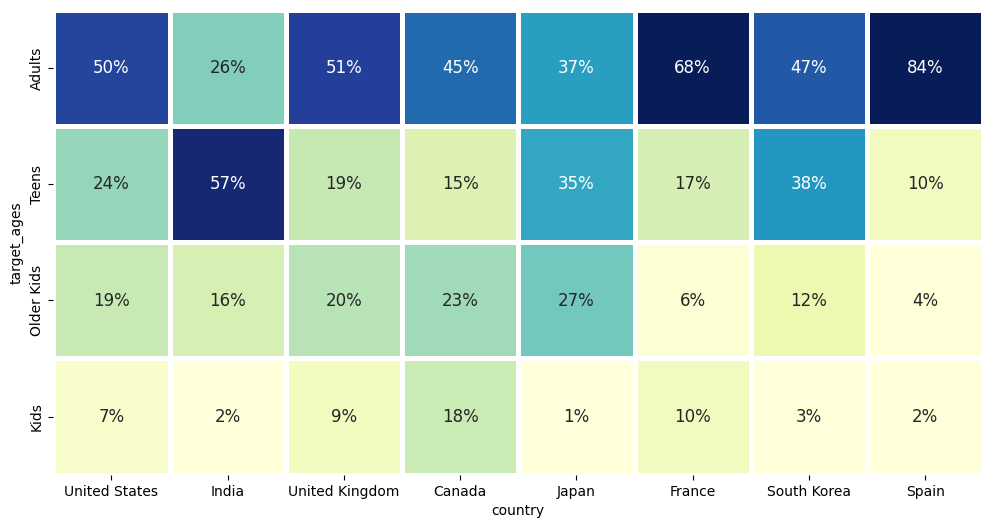

In [ ]:
# Create a Figure and Axes for the Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

# Define the Order of Countries and Age Categories:
country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', ]
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

# Create the Heatmap:
sns.heatmap(data=df_heatmap.loc[age_order, country_order2],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()


##### **1. Why did you pick the specific chart?**

**Answer Here.**

A heatmap is a suitable choice when visualizing the relationships between two categorical variables, in this case, countries and age groups. It allows for a clear representation of patterns, trends, and comparisons across different categories.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

**Answer Here**

In summary, the data provided suggests that the level of interest in the subject varies across different countries and target age groups. Here are the overall conclusions:

Among the countries listed, Spain stands out with the highest percentage of adults showing interest at 84%. This indicates a strong interest in the subject among adults in Spain.

1.**France**- Follows closely with 68% of adults expressing interest, demonstrating a significant level of engagement in the subject.

2.**India**- It has the highest percentage of interest among teenagers, with 57% showing interest. This suggests a notable interest among the younger population in India.

3.**United Kingdom** -It has a relatively high level of interest among adults, with 51% expressing interest.


4.**South Korea** , **United States**- Both have 47% of adults showing interest, indicating a moderate level of engagement in these countries.

5.**Japan**- It shows a moderate level of interest among both adults and teens, with 36% of each group expressing interest.

6.**Canada**- It has the lowest percentage of interest among the listed countries, with 45% of adults showing interest.

**Overall, these conclusions highlight the varying levels of interest in the subject among different countries and target age groups. The data indicates that Spain, France, and united kindom have higher levels of interest in the adults, while India has relatively lower interest compared to the other countries**.

##**3.Will the gained insights help creating a positive business impact?**

**Answer Here**

The gained insights can potentially help in creating a positive business impact, depending on the context and specific business goals.

1-Product Development

2-Market Expansion

3-Partnerships and Collaborations

Chart 15

In [ ]:
# Pair Plot visualization code
# Count the number of occurrences of each country in the 'country' column of the DataFrame 'netflix_df
country_count=netflix_df['country'].value_counts().sort_values(ascending=False)


country_count=pd.DataFrame(country_count)

## Select the top 11 countries with the highest counts.
topcountries=country_count[0:11]

topcountries

country
United States      2549
India               923
Unknown             506
United Kingdom      396
Japan               225
South Korea         183
Canada              177
Spain               134
France              115
Egypt               101
Mexico              100

In [ ]:
## Define a dictionary 'data3' with two lists: 'number' and 'country'.

data3 = dict(
    number=[3062, 923, 397, 226, 183, 177, 134, 115, 101, 100],
    country=["United States", "India", "United Kingdom", "Canada", "Spain", 'Turkey', 'Philippines', 'France',
             'South Korea', 'Australia']
)

## Create a funnel chart using Plotly Express.
fig = px.funnel(data3,
                x='number',
                y='country',
                title='Funnel Chart- Top 10 Countries by Number of Movies',
                labels={'number': 'Number of Movies', 'country': 'Country'},
                color_discrete_sequence=px.colors.qualitative.Plotly,
                height=1000,
                width=900,
                template='plotly_dark'
                )
fig.show()

##### **1. Why did you pick the specific chart?**

**Answer Here.**

Funnel charts are often used to represent a gradual reduction in data as it moves through different stages or categories. In this case, the chart visualizes the number of movies in the top 10 countries, showcasing the decreasing count from the top to the bottom.

##### **2. What is/are the insight(s) found from the chart?**

**Answer Here**

The United States has the highest number of movies, with 3062 films, indicating a dominant presence in the film industry.India is the second-highest contributor with 923 movies, demonstratin

## ***5. Hypothesis Testing***

In [ ]:
#making copy of df_clean_frame
netflix_hypothesis=netflix_df.copy()

#head of df_hypothesis
netflix_hypothesis.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...         14        2020   
1  After a devastating earthquake hits Mexico Cit...         23        2016   
2  When an army recruit is found dead, his fellow...         20        2018   
3  In a postapocalyptic world, rag-doll robots hi...         16        2017   
4  A brilliant group of students become card-coun...          1        2020   

   month_added target_ages  count  
0            8      Adults      1  
1           12      Adults      1  
2           12      Adults      1  
3           11       Teens      1  
4            1       Teens      1

In [ ]:
#filtering movie from Type_of_show column
netflix_hypothesis = netflix_hypothesis[netflix_hypothesis["type"] == "Movie"]

In [ ]:
# with respect to each ratings assigning it into group of categories

ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_hypothesis['target_ages'] = netflix_hypothesis['rating'].replace(ratings_ages)

#let's see unique target ages
netflix_hypothesis['target_ages'].unique()

array(['Adults', 'Teens', 'Older Kids', 'Kids'], dtype=object)

In [ ]:
# Convert the 'target_ages' column to a categorical data type with specified categories.
netflix_hypothesis['target_ages'] = pd.Categorical(netflix_hypothesis['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

## Convert the 'duration' column to a string type.
netflix_hypothesis['duration'] = netflix_hypothesis['duration'].astype(str)
netflix_hypothesis['duration'] = netflix_hypothesis['duration'].str.extract('(\d+)')

## Convert the 'duration' column to a numeric data type.
netflix_hypothesis['duration'] = pd.to_numeric(netflix_hypothesis['duration'])

netflix_hypothesis.head(3)

show_id   type  title           director  \
1      s2  Movie   7:19  Jorge Michel Grau   
2      s3  Movie  23:59       Gilbert Chan   
3      s4  Movie      9        Shane Acker   

                                                cast        country  \
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   

  date_added  release_year rating  duration  \
1 2016-12-23          2016  TV-MA        93   
2 2018-12-20          2011      R        78   
3 2017-11-16          2009  PG-13        80   

                                           listed_in  \
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   

                                         description  day_added  year_added  \
1  After a devastating earthquake hits Mexico Cit...         23        2016   
2  When an army recruit is found dead, his fellow...         20        2018   
3  In a postapocalyptic world, rag-doll robots hi...         16        2017   

   month_added target_ages  count  
1           12      Adults      1  
2           12      Adults      1  
3           11       Teens      1

In [ ]:
#group_by duration and target_ages
group_by_= netflix_hypothesis[['duration','target_ages']].groupby(by='target_ages')

#mean of group_by variable
group=group_by_.mean().reset_index()
group

target_ages    duration
0        Kids   66.486891
1  Older Kids   92.024648
2       Teens  110.025332
3      Adults   98.230769

In [ ]:
#In A and B variable grouping values
A= group_by_.get_group('Kids')
B= group_by_.get_group('Older Kids')


#mean and std. calutation for kids and older kids variables
M1 = A.mean()      # Mean of the 'Kids' group
S1 = A.std()    # Standard deviation of the 'Kids' group


# Calculating the mean and standard deviation for the 'Older Kids' group (B).
M2= B.mean()
S2 = B.std()

## Printing the calculated means and standard deviations for both groups.
print('Mean for movies rated for Kids {} \n Mean for  movies rated for older kids {}'.format(M1,M2))
print('Std for  movies rated for Older Kids {} \n Std for  movies rated for kids {}'.format(S2,S1))

Mean for movies rated for Kids duration    66.486891
dtype: float64 
 Mean for  movies rated for older kids duration    92.024648
dtype: float64
Std for  movies rated for Older Kids duration    31.182577
dtype: float64 
 Std for  movies rated for kids duration    31.739465
dtype: float64


In [ ]:
# Import the 'stats' module from SciPy.
from scipy import stats

# Calculate the lengths (number of observations) of groups
n1 = len(A)
n2= len(B)
print(n1,n2)

## Calculate the degrees of freedom (dof) for the t-test.
dof = n1+n2-2
print('dof',dof)

## Calculate the pooled variance (sp^2) using the formula.
sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

## Calculate the pooled standard deviation
sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

267 852
dof 1117
SP_2 = duration    999.049147
dtype: float64
SP duration    31.607739
dtype: float64
tvalue -11.51992627853396


### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### **1. State Your research hypothesis as a null hypothesis and alternate hypothesis.**

**Answer Here.**

HO:Movies rated for kids and older kids are at least two hours long.(Null Hypothesis)

H1:Movies rated for kids and older kids are not at least two hours long.(Alternate Hypothesis)

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

#t-distribution
stats.t.ppf(0.025,dof)

-1.9620900365868952

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.9620900365868947

##### **Which statistical test have you done to obtain P-Value?**

**Answer Here.**

**t-value** is not in the range, the **null hypothesis is rejecte**d.

**As a result, movies rated for kids and older kids are not at least two hours long.**

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

#making copy of df_clean_frame
netflix_hypothesis=netflix_df.copy()
#head of df_hypothesis
netflix_hypothesis.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating   duration  \
0 2020-08-14          2020  TV-MA  4 Seasons   
1 2016-12-23          2016  TV-MA     93 min   
2 2018-12-20          2011      R     78 min   
3 2017-11-16          2009  PG-13     80 min   
4 2020-01-01          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...         14        2020   
1  After a devastating earthquake hits Mexico Cit...         23        2016   
2  When an army recruit is found dead, his fellow...         20        2018   
3  In a postapocalyptic world, rag-doll robots hi...         16        2017   
4  A brilliant group of students become card-coun...          1        2020   

   month_added target_ages  count  
0            8      Adults      1  
1           12      Adults      1  
2           12      Adults      1  
3           11       Teens      1  
4            1       Teens      1

In [ ]:
# Extract numeric values from the 'duration' column using a regular expression.
netflix_hypothesis['duration'] = netflix_hypothesis['duration'].str.extract('(\d+)')

# Convert the 'duration' column to a numeric data type.
netflix_hypothesis['duration'] = pd.to_numeric(netflix_hypothesis['duration'])

In [ ]:
## Convert the 'type' column to a categorical data type with specified categories.
netflix_hypothesis['type'] = pd.Categorical(netflix_hypothesis['type'], categories=['Movie','TV Show'])

#head of df_
netflix_hypothesis.head(3)

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   

                                                cast    country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...     Brazil 2020-08-14   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...     Mexico 2016-12-23   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...  Singapore 2018-12-20   

   release_year rating  duration  \
0          2020  TV-MA         4   
1          2016  TV-MA        93   
2          2011      R        78   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...         14        2020   
1  After a devastating earthquake hits Mexico Cit...         23        2016   
2  When an army recruit is found dead, his fellow...         20        2018   

   month_added target_ages  count  
0            8      Adults      1  
1           12      Adults      1  
2           12      Adults      1

In [ ]:
# Perform Statistical Test to obtain P-Value
#group_by duration and TYPE
group_by_= netflix_hypothesis[['duration','type']].groupby(by='type')

#mean of group_by variable
group1=group_by_.mean().reset_index()
group1

type   duration
0    Movie  99.307978
1  TV Show   1.760833

In [ ]:
## Get the data group with the label 'Movie' and store it in variable A
A= group_by_.get_group('Movie')
## Get the data group with the label 'TV Show' and store it in variable B
B= group_by_.get_group('TV Show')


# Calculate the mean and standard deviation for group A
M1 = A.mean()  ## Calculate the mean of group A
S1 = A.std()    # Calculate the standard deviation

## Calculate the mean and standard deviation for group B
M2= B.mean()
S2 = B.std()


print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

Mean  duration    99.307978
dtype: float64
Std  duration    1.560603
dtype: float64


In [ ]:
# Import the necessary libraries for statistical calculations
from scipy import stats

#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

## Calculate the degrees of freedom (DOF) for the t-test
dof = n1+n2-2
print('dof',dof)

## Calculate the pooled variance (sp^2) using the formula for two-sample pooled variance
sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

## Calculate the pooled standard deviation (sp) by taking the square root of the pooled variance
sp = np.sqrt(sp_2)
print('SP',sp)

# Calculate the t-value for the two-sample t-test
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

5377 2400
dof 7775
SP_2 = duration    252.849635
dtype: float64
SP duration    15.901246
dtype: float64
tvalue 249.8923650639716


#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
#t-distribution
stats.t.ppf(0.025,dof)

-1.9602691465072455

In [ ]:
#t-distribution
stats.t.ppf(0.975,dof)

1.960269146507245

##### **Which statistical test have you done to obtain P-Value?**

**Answer Here.**

Because the t-value is not in the range, the null hypothesis is rejected.

**As a result, The duration which is more than 90 mins are movies**

## ***6. Feature Engineering & Data Pre-processing***

In [ ]:
# Combining all the clustering attributes into a single column
# Create a new column 'clustering' in the DataFrame
# This column will contain a combination of values from 'director', 'cast', 'country', 'listed_in', and 'description'
netflix_df['clustering'] = (netflix_df['director'] + ' ' + netflix_df['cast'] +' ' +
                                 netflix_df['country'] +' ' + netflix_df['listed_in'] +
                                 ' ' + netflix_df['description'])


In [ ]:
# Access the value at index 25 in the 'clustering' column of the 'netflix_df' DataFrame
# This code retrieves the value of the 'clustering' column for the row with index 25.
# It allows you to see the concatenated attributes for a specific entry in your DataFrame.

netflix_df['clustering'][25]

'Lyric R. Cabral, David Felix Sutcliffe Unknown United States Documentaries This real-life look at FBI counterterrorism operations features access to both sides of a sting: the government informant and the radicalized target.'

### **4. Textual Data Preprocessing**


In [ ]:
# Expand Contraction
# Expand Contraction
# Lower Casing
# Remove Punctuations
# Remove URLs & Remove words and digits contain digits
# Remove Stopwords
# Remove White spaces
# Rephrase Text
# Tokenization
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

## Import the necessary libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string
import nltk
nltk.download('all',quiet=True)
from PIL import Image

## Define a function for text transformation and preprocessing
def transform_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Tokenize text into words using NLTK's word_tokenize function
    words = nltk.word_tokenize(text)

    # Remove non-alphanumeric characters
    words = [word for word in words if word.isalnum()]

    # Remove stopwords and punctuation
    stopwords_set = set(stopwords.words('english'))
    punctuation_set = set(string.punctuation)
    words = [word for word in words if word not in stopwords_set and word not in punctuation_set]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    # Join words into a string and return
    return ' '.join(lemmatized_words)

In [ ]:
# Create a new column 'Clean_Text' in the DataFrame by applying the 'transform_text' function
# to the 'clustering' column. This will store the preprocessed and cleaned text.

netflix_df['Clean_Text'] = netflix_df['clustering'].apply(transform_text)

In [ ]:
# Access the value in the "Clean_Text" column at index 50 of the DataFrame 'netflix_df'

netflix_df["Clean_Text"][50]

'roland emmerich steven strait camilla belle cliff curtis joel virgel affif ben badra mo zinal nathanael baring mona hammond omar sharif united state south africa action adventure fierce mammoth hunter set impossible journey rescue woman love vicious warlord save people village'

#### **Text Vectorization**

**TF-IDF combines two metrics: Term frequency (TF) and inverse document frequency (IDF).**

Term Frequency (TF): This metric measures the frequency of a term in a document. It assumes that the more often a term appears in a document, the more relevant it is to that document. It is calculated using the formula:

**TF(t, d) = (Number of times term t appears in document d) / (Total number of terms in document d)**

**Inverse Document Frequency (IDF): This metric measures the importance of a term across a collection of documents. It gives higher weight to terms that appear less frequently in the entire collection. It is calculated using the formula:**


**IDF(t) = log_e(Total number of documents / Number of documents containing term t)**

In [ ]:
# Vectorizing Text
# Assign the 'Clean_Text' attribute of the 'netflix_df' object to the variable 'bag_of_words'.
bag_of_words = netflix_df.Clean_Text

In [ ]:
# Create a TF-IDF (Term Frequency-Inverse Document Frequency) vectorizer with a maximum of 20,000 features.
t_vectorizer = TfidfVectorizer(max_features=20000)

# Use the TF-IDF vectorizer to transform the 'bag_of_words' data into a TF-IDF matrix.
X= t_vectorizer.fit_transform(bag_of_words)

In [ ]:
print(X.shape)

(7777, 20000)


In [ ]:
# Retrieve the feature (word) names from the TF-IDF vectorizer
feature_names = t_vectorizer.get_feature_names_out()
print(feature_names)

['007' '10' '100' ... 'şimşek' 'şinasi' 'şükrü']


##### **Which text vectorization technique have you used and why?**

**Answer Here.**

**1. Weighted Term Importance:** TF-IDF assigns weights to terms (words) based on their frequency in a document relative to their frequency across the entire corpus. This helps to highlight terms that are relatively important within a specific document while downplaying common terms that appear in many documents.

**2. Dimensionality Reduction:** By limiting the number of features (words) with a maximum number of features parameter (in this case, 20,000), TF-IDF reduces the dimensionality of the data. This can be especially important when working with large text datasets to improve efficiency and reduce noise.

**3. Ability to Capture Context:** TF-IDF considers the context of words within the entire dataset, which makes it better at capturing the significance of terms compared to simple bag-of-words approaches.

**4. Common Usage:** TF-IDF is widely used in natural language processing (NLP) and text analytics tasks, making it a standard choice for many text-based applications.

### **7. Dimesionality Reduction**

##### **Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)**

**Answer Here.**

PCA to reduce the dimensionality of the dataset. PCA identifies the directions (principal components) along which the data varies the most. These components are ordered by the amount of variance they explain in the data.

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Create a PCA transformer object and specify the number of components you want to retain (e.g., 2 components)
n_components = 2  # Adjust this value based on your desired dimensionality
transformer = PCA(n_components=n_components)

# Fit the PCA transformer to the TF-IDF matrix 'X'
X_pca = transformer.fit_transform(X.toarray())

# Now you have reduced-dimensional data in 'X_pca' with the specified number of components.
# You can use 'X_pca' for further analysis or visualization.

**Answer Here.**

PCA can extract the most relevant features from a dataset. It transforms the original features into a new set of uncorrelated variables called principal components. These components are linear combinations of the original features and capture the maximum amount of variation present in the data.

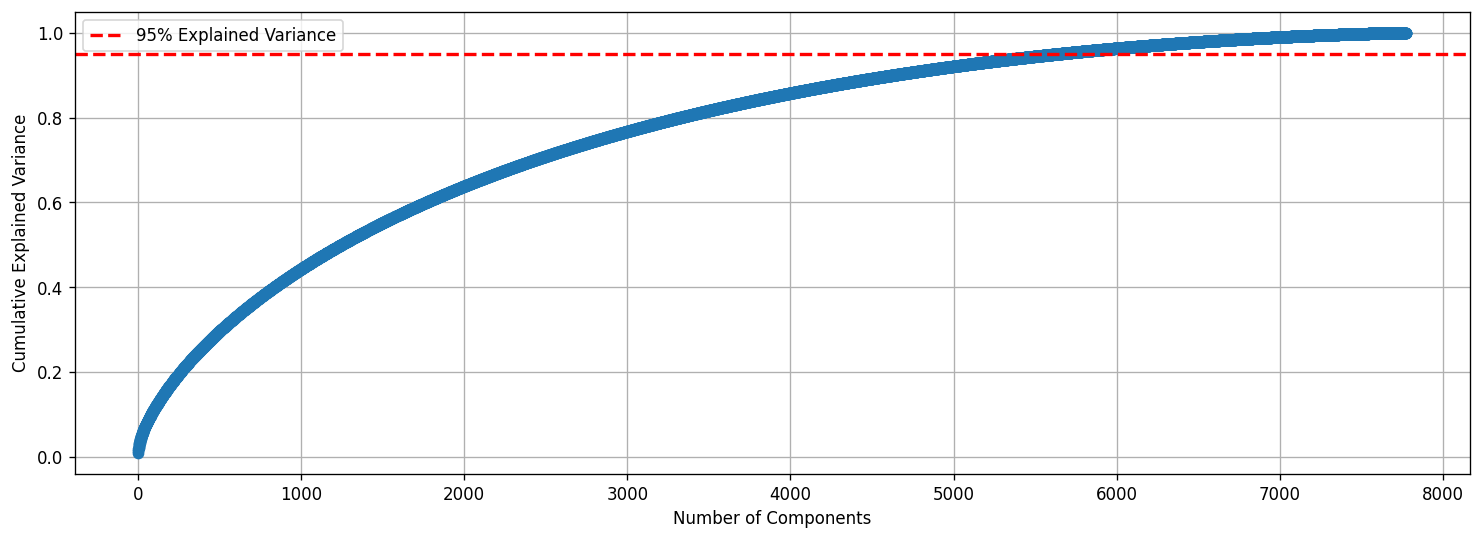

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Create a PCA transformer object
transformer = PCA()

# Fit the PCA transformer to your data 'X'
transformer.fit(X.toarray())

# Calculate the cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(transformer.explained_variance_ratio_)

# Create a figure with a specified size and DPI
plt.figure(figsize=(15, 5), dpi=120)

# Plot the cumulative explained variance against the number of components
plt.plot(cumulative_variance_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axhline(y=0.95, color='r', linestyle='--', linewidth=2, label='95% Explained Variance')
plt.grid(True)  # Add a grid to the plot
plt.legend()  # Add a legend

# Show the plot
plt.show()

**The plot helps in determining the number of components to consider for dimensionality reduction. You can select the number of components where the cumulative explained variance reaches a satisfactory threshold, such as 95%. The point where the curve intersects or is closest to the threshold line can guide you in choosing the appropriate number of components for your analysis.**

In [ ]:
# Import the necessary libraries
from sklearn.decomposition import PCA

# Create an instance of PCA with the desired explained variance ratio
pca_tuned = PCA(n_components=0.95)

# Fit the PCA model on the input data, X, which is converted to a dense array
pca_tuned.fit(X.toarray())

# Transform the input data, X, to its reduced dimensional representation
X_transformed = pca_tuned.transform(X.toarray())

# Print the shape of the transformed data to see the number of samples and transformed features
print(X_transformed.shape)


(7777, 5643)


In [ ]:
X_transformed

array([[ 1.21912265e-01, -2.09090557e-02,  8.68740554e-03, ...,
         5.12263066e-03,  1.15005612e-02,  2.06357771e-03],
       [-4.72706320e-02, -3.45062660e-02,  2.20489117e-02, ...,
        -1.03728757e-02,  5.85494306e-03,  2.95426867e-03],
       [-4.86965714e-02, -5.03689271e-02, -2.92372602e-02, ...,
         1.15119885e-02, -6.86426888e-03, -7.24308409e-03],
       ...,
       [-2.14697687e-02,  9.03349380e-02,  1.70444414e-01, ...,
         2.12511172e-03,  2.52279463e-03, -3.34978594e-03],
       [ 1.02410519e-01,  1.10541511e-02,  2.57951809e-02, ...,
        -2.98088004e-03, -6.32354024e-03, -1.09657963e-02],
       [-5.54698022e-02,  2.35621642e-01,  1.45272464e-01, ...,
         2.34210297e-04, -1.51493181e-02, -1.20819070e-02]])

**ML Model Implementation**

### ML Model

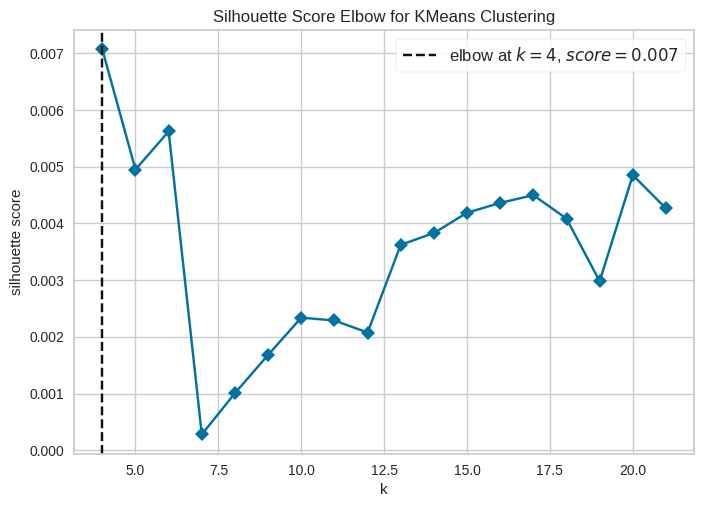

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Initialize the KMeans model with a random_state of 5
model = KMeans(random_state=5)

# Initialize the KElbowVisualizer with the KMeans model and desired parameters
visualizer = KElbowVisualizer(model, k=(4, 22), metric='silhouette', timings=False, locate_elbow=True)

# Fit the visualizer on the transformed data
visualizer.fit(X_transformed)

# Display the elbow plot
visualizer.show()

**The plot will also indicate the "elbow" point, which represents the recommended number of clusters based on the selected metric.Using elbow plot with the optimal number of 5 clusters** .

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples

## Define a function for silhouette score analysis
def silhouette_score_analysis(n):

  # Loop through the range of cluster numbers from 2 to n
  for n_clusters in range(2,n):

    # Create a KMeans clustering model with the current number of clusters
      km = KMeans (n_clusters=n_clusters, random_state=5)

      # Use the KMeans model to predict cluster labels for the data
      preds = km.fit_predict(X_transformed)
      centers = km.cluster_centers_

    # Calculate the silhouette score for the current clustering
      score = silhouette_score(X_transformed, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(X_transformed)   # Fit the training data to the visualizer
      visualizer.poof()    # Draw/show/poof the data

For n_clusters = 2, silhouette score is 0.005084936071406327


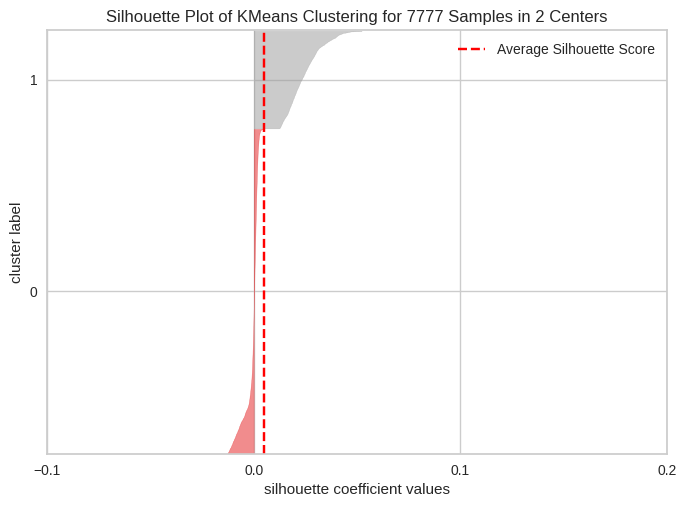

For n_clusters = 3, silhouette score is 0.006191185438460101


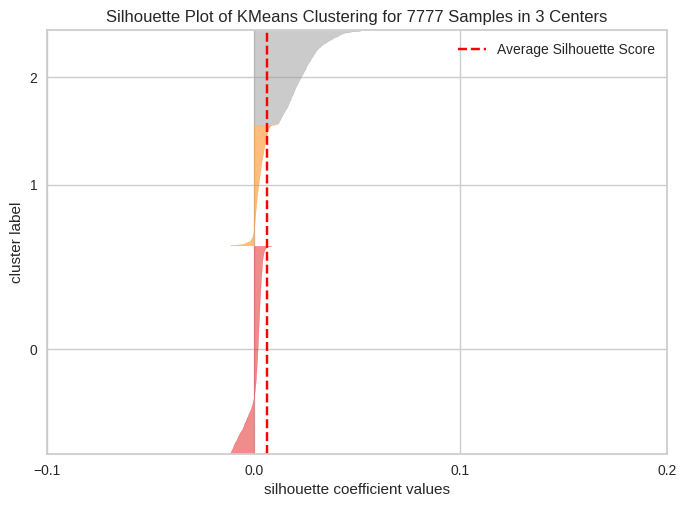

For n_clusters = 4, silhouette score is 0.007065766999963822


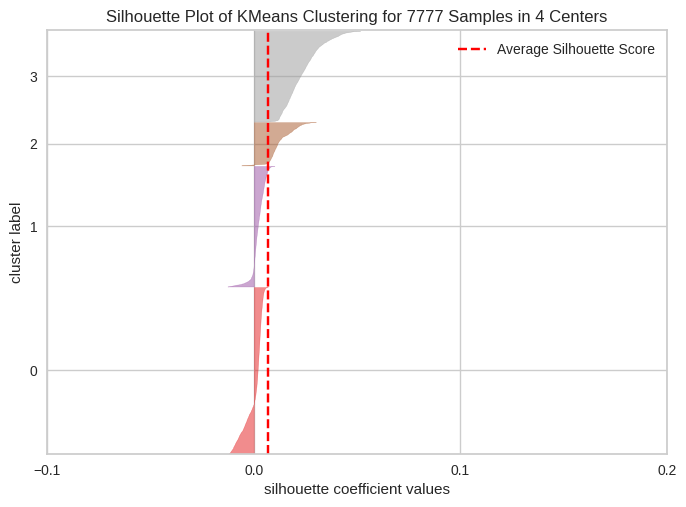

For n_clusters = 5, silhouette score is 0.004948986369231762


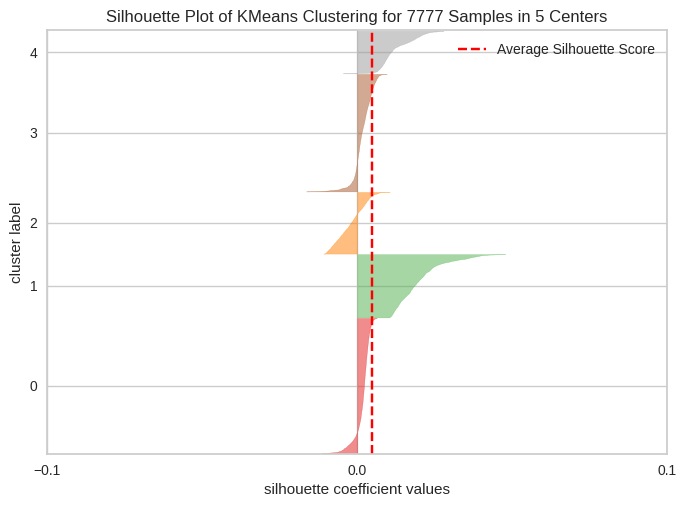

For n_clusters = 6, silhouette score is 0.005621736566852839


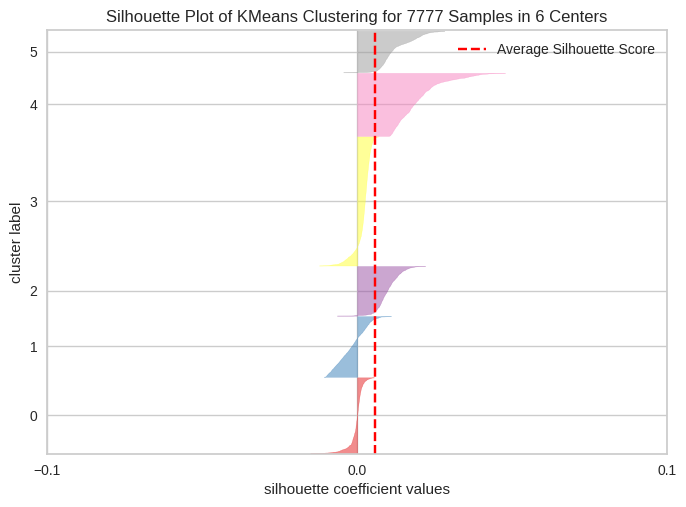

For n_clusters = 7, silhouette score is 0.00027909315994536403


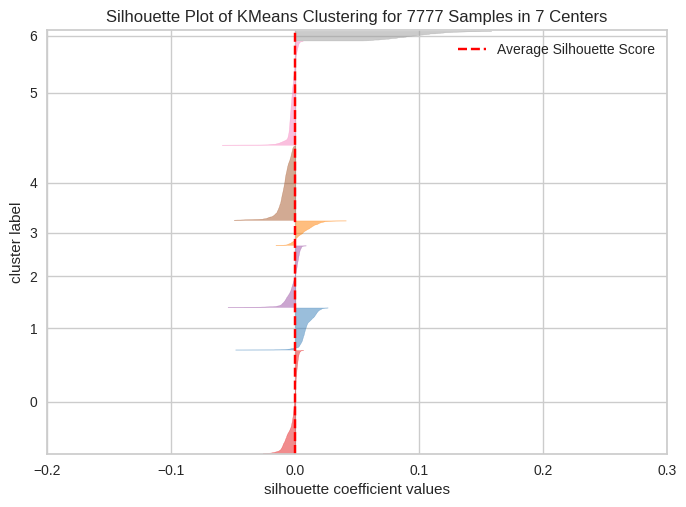

For n_clusters = 8, silhouette score is 0.001007409929942404


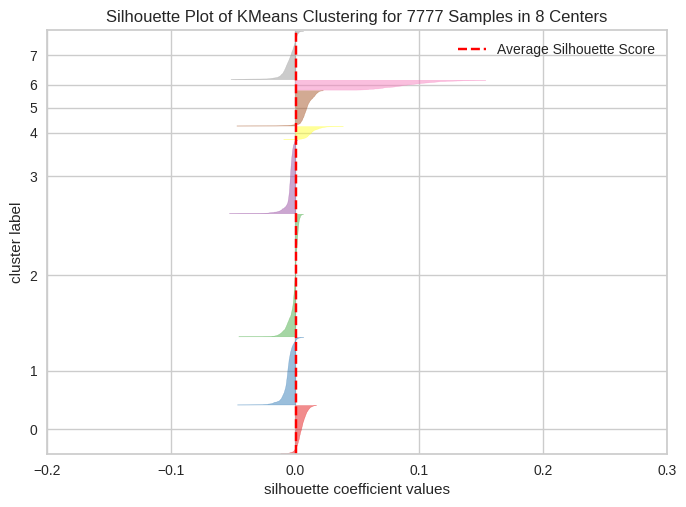

For n_clusters = 9, silhouette score is 0.0016819416901024883


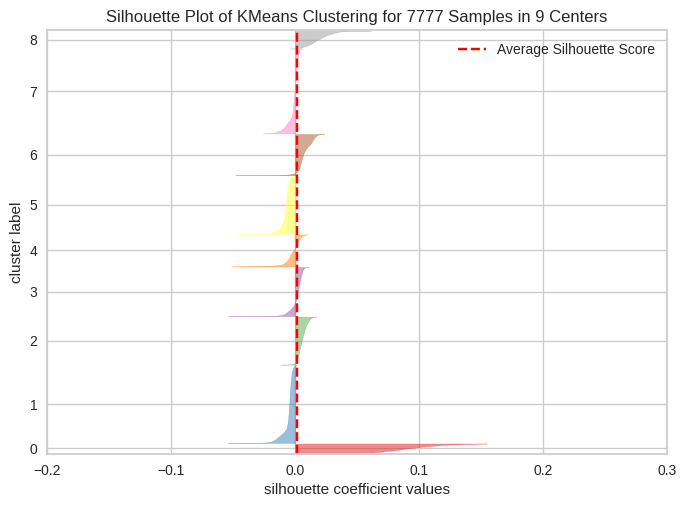

For n_clusters = 10, silhouette score is 0.002338337618782961


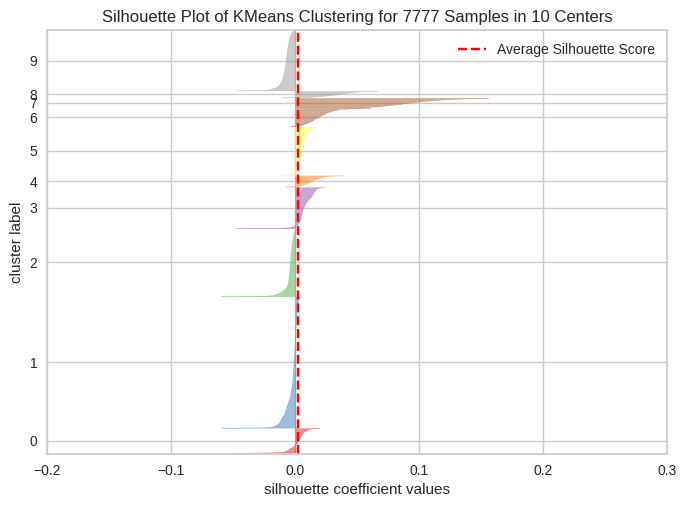

For n_clusters = 11, silhouette score is 0.0022881712440721465


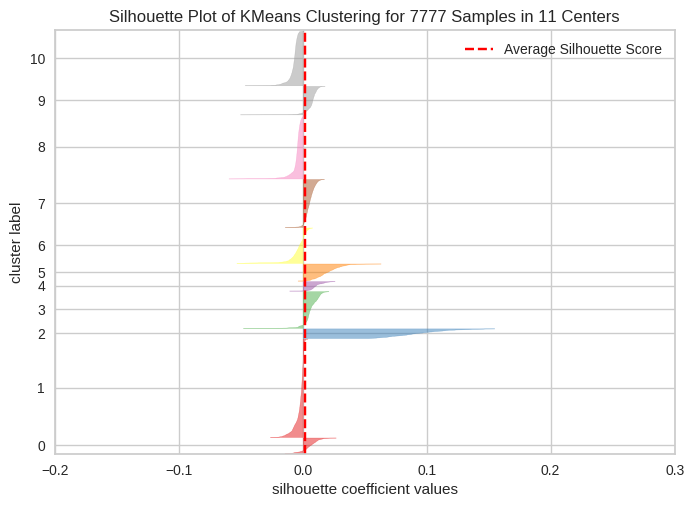

For n_clusters = 12, silhouette score is 0.0020760613668915737


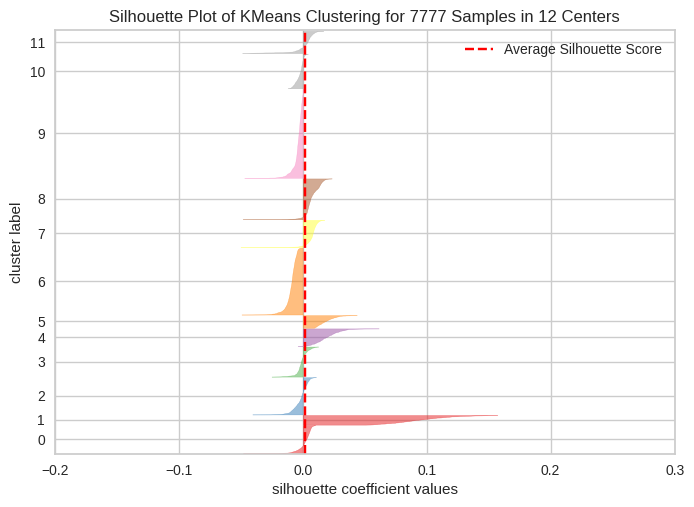

For n_clusters = 13, silhouette score is 0.003622311366839722


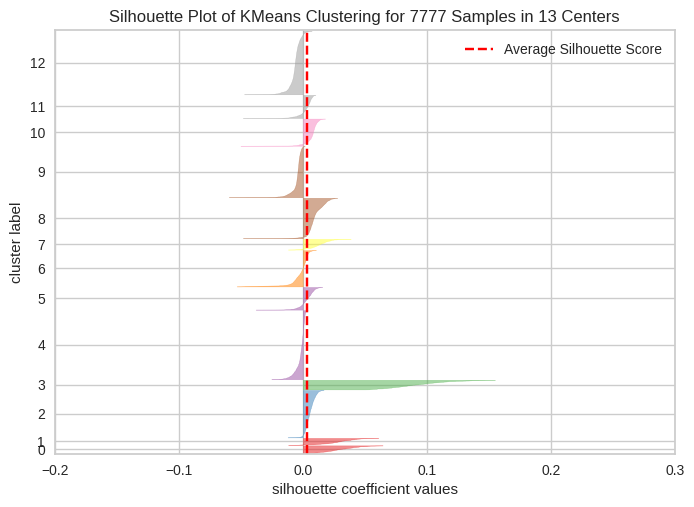

For n_clusters = 14, silhouette score is 0.0038300065363850947


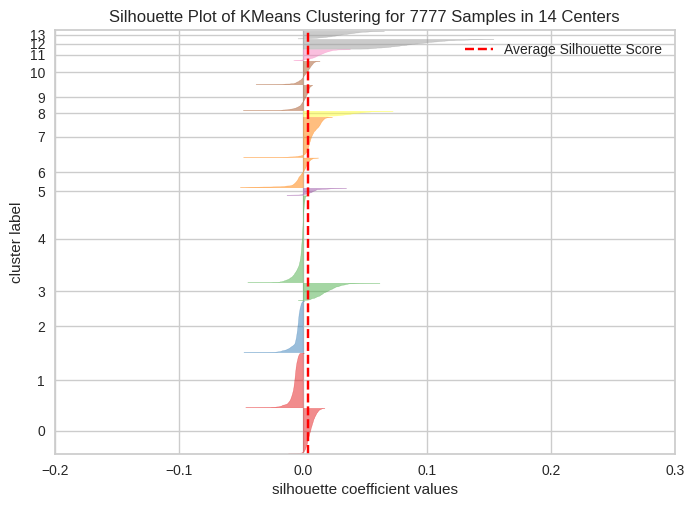

In [ ]:
silhouette_score_analysis(15)

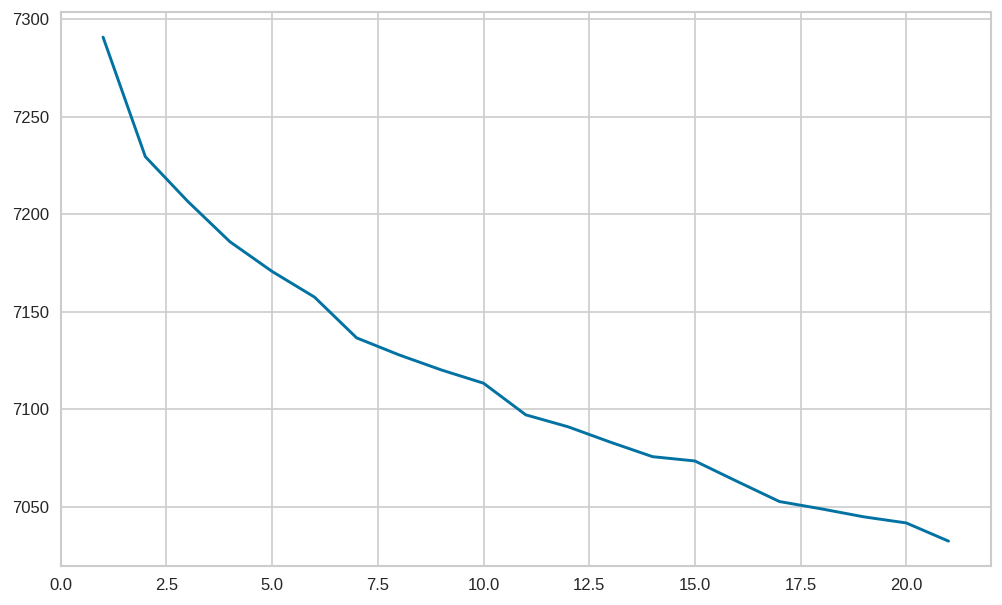

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Create a figure with a specific size and resolution
plt.figure(figsize=(10, 6), dpi=120)

# Initialize an empty list to store the within-cluster sum of squares (WCSS)
wcss = []

# Iterate over different numbers of clusters
for i in range(1, 22):
    # Create a KMeans model with default parameters
    model = KMeans(random_state=0)

    # Initialize the KMeans algorithm with specific parameters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)

    # Fit the KMeans algorithm to the transformed data
    kmeans.fit(X_transformed)

    # Append the WCSS to the list
    wcss.append(kmeans.inertia_)

# Plot the number of clusters against the WCSS
plt.plot(range(1, 22), wcss)

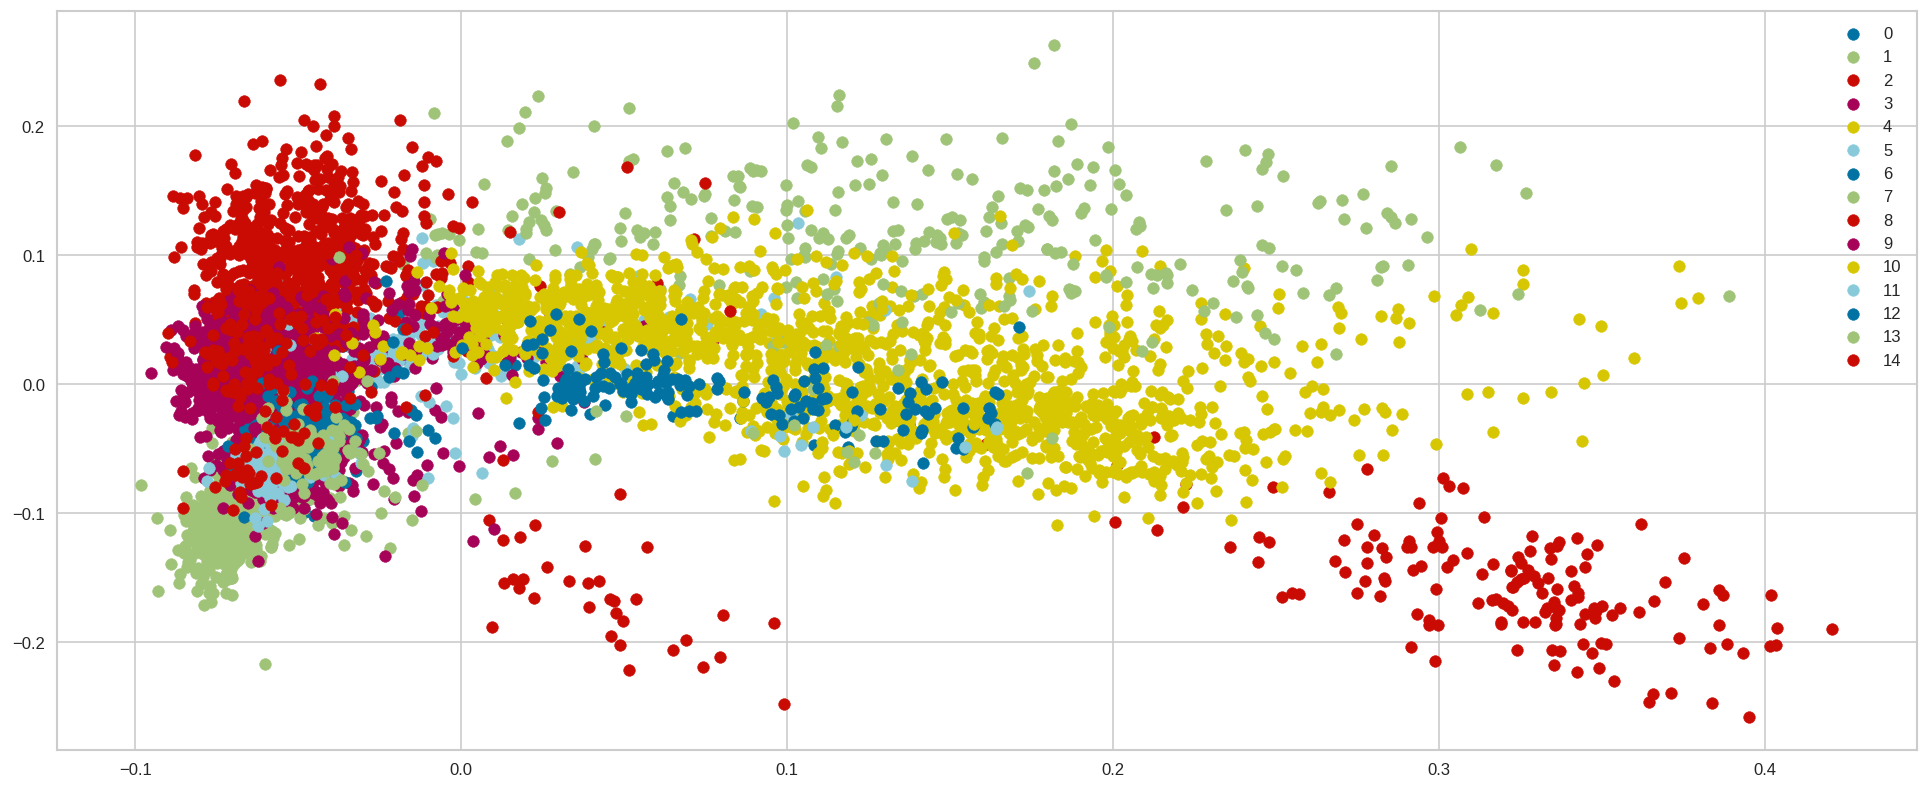

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

# Create a figure with a larger size and resolution
plt.figure(figsize=(20, 8), dpi=120)

# Initialize a KMeans model with 15 clusters
kmeans = KMeans(n_clusters=15, init='k-means++', random_state=9)

# Fit the KMeans algorithm to the transformed data
kmeans.fit(X_transformed)

# Predict the labels of the clusters
label = kmeans.fit_predict(X_transformed)

# Get unique labels from the predictions
unique_labels = np.unique(label)

# Plot the results
for i in unique_labels:
    # Scatter plot the points belonging to each cluster
    plt.scatter(X_transformed[label == i, 0], X_transformed[label == i, 1], label=i)

# Display a legend to identify the clusters
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Add cluster values to the dateframe.
netflix_df['cluster_number'] = kmeans.labels_

In [ ]:
netflix_df.head(1)

show_id     type title director  \
0      s1  TV Show    3%  Unknown   

                                                cast country date_added  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...  Brazil 2020-08-14   

   release_year rating   duration  \
0          2020  TV-MA  4 Seasons   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   

                                         description  day_added  year_added  \
0  In a future where the elite inhabit an island ...         14        2020   

   month_added target_ages  count  \
0            8      Adults      1   

                                          clustering  \
0  Unknown João Miguel, Bianca Comparato, Michel ...   

                                          Clean_Text  cluster_number  
0  unknown joão miguel bianca comparato michel go...               4

In [ ]:
#word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Define a function for generating word clouds for a specific cluster category
def word_count(category):
  print("Exploring Cluster", category)

  # Define the columns to be considered for word clouds
  col_names = ['type','title','country','rating','listed_in','description']

   # Iterate through the selected columns
  for i in col_names:
    # Create a DataFrame containing the cluster number and the selected column, excluding rows with missing values
    df_word_cloud = netflix_df[['cluster_number',i]].dropna()
    df_word_cloud = df_word_cloud[df_word_cloud['cluster_number']==category]
    text = " ".join(word for word in df_word_cloud[i])

     # Create a set of stopwords to be excluded from the word cloud
    stopwords = set(STOPWORDS)

   # Generate a word cloud image
    wordcloud = WordCloud(stopwords=stopwords, background_color="#FFC0CB",width=500,height=500).generate(text)

  # Configure the plot
    plt.rcParams["figure.figsize"] = (10,10)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

  # Print a message indicating the column being analyzed
    print("Looking for insights from", i ,"Movies/TV Shows")

  # Display the generated word cloud
    plt.show()

Exploring Cluster 9
Looking for insights from type Movies/TV Shows


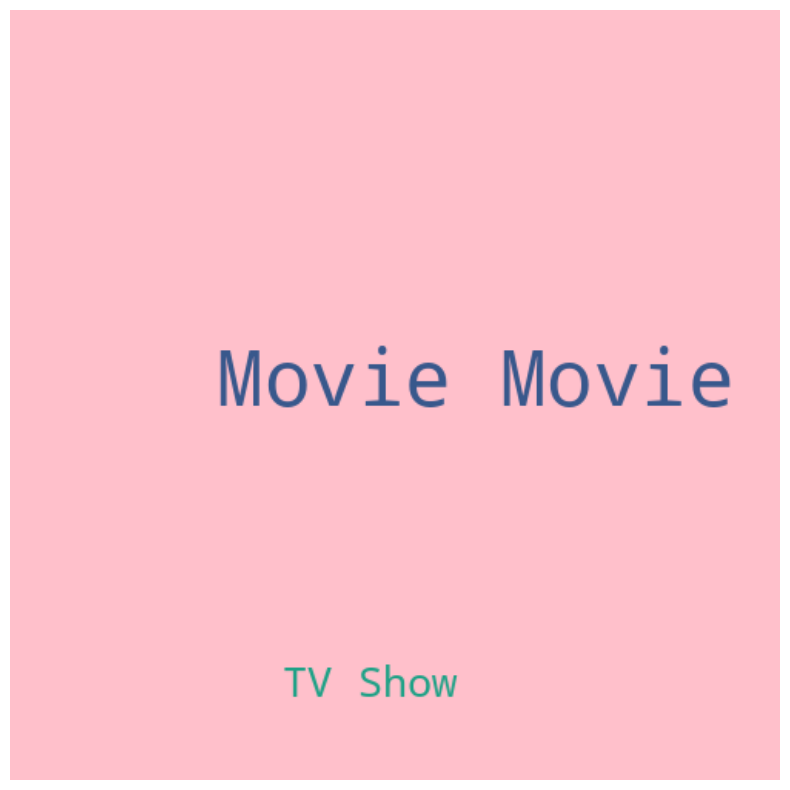

Looking for insights from title Movies/TV Shows


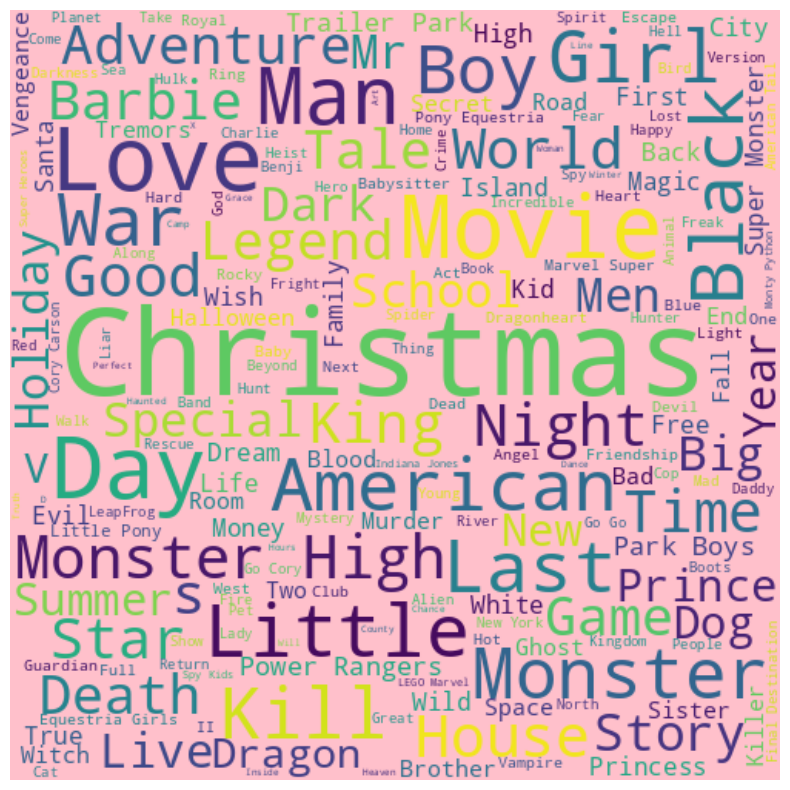

Looking for insights from country Movies/TV Shows


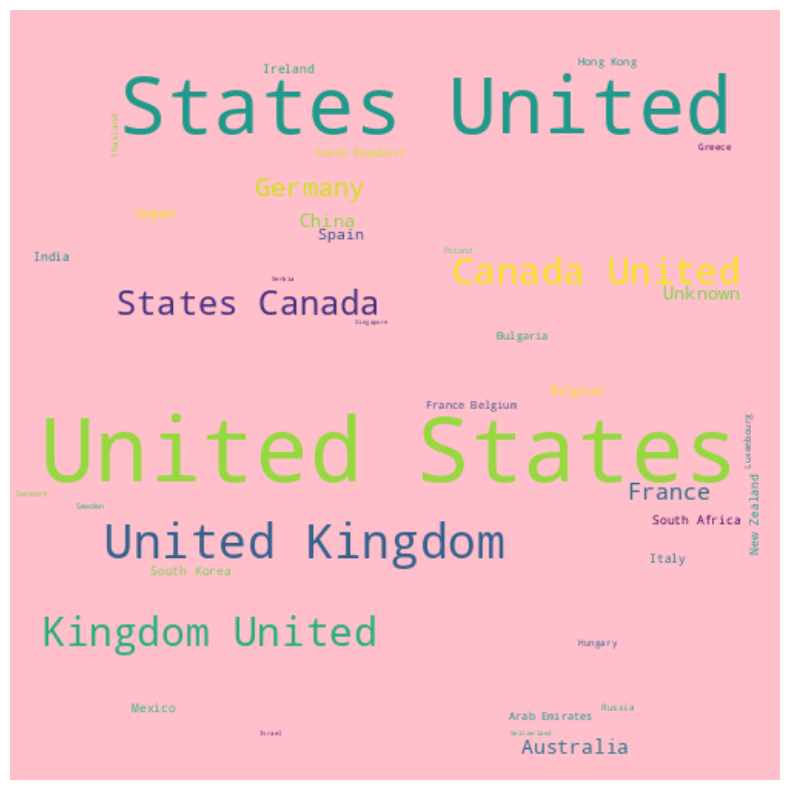

Looking for insights from rating Movies/TV Shows


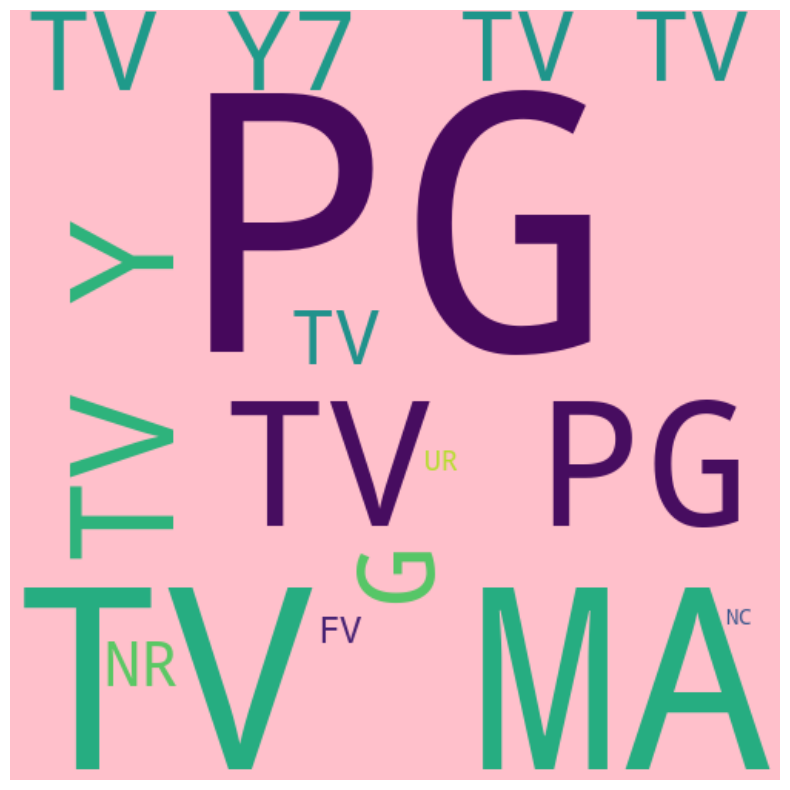

Looking for insights from listed_in Movies/TV Shows


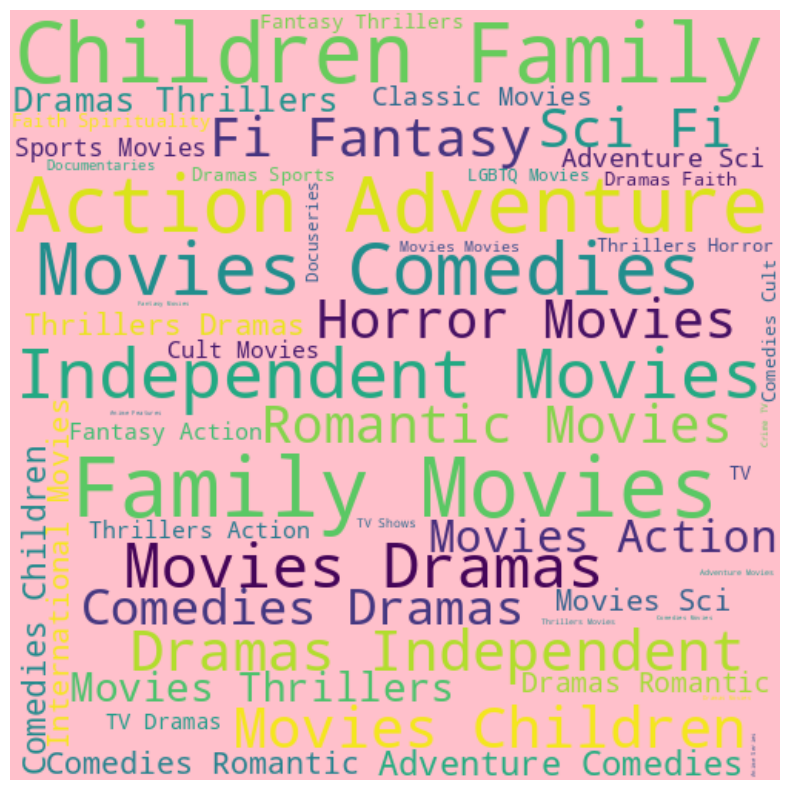

Looking for insights from description Movies/TV Shows


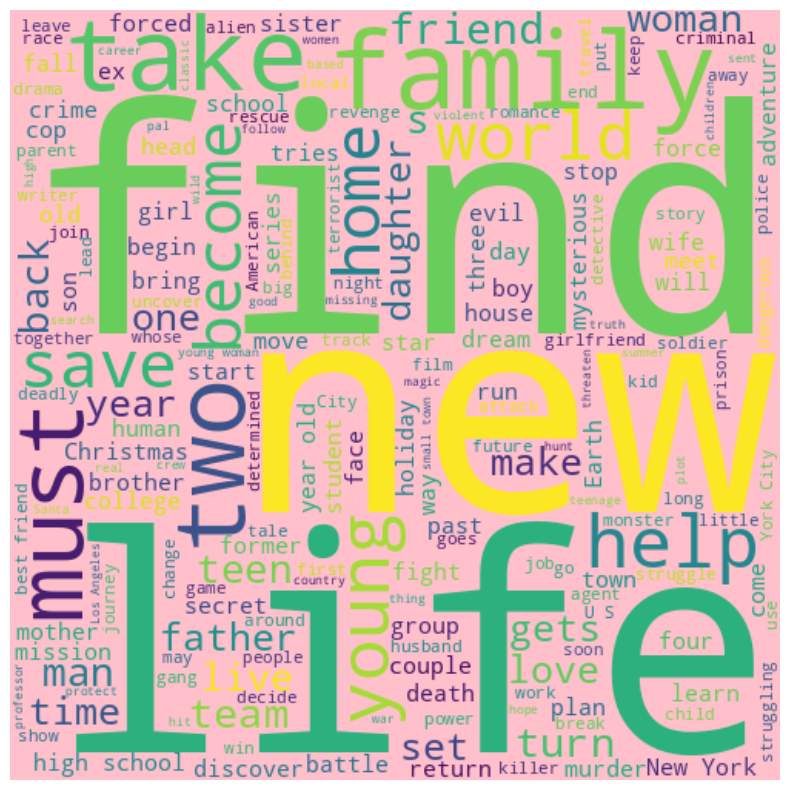

In [ ]:
word_count(9)

Cluster 9 in a dataset contains a total of 232 words. The most frequently occurring words in this cluster are as follows:

**Type** -  Movie & Tv shows

**Title** - Broadway, Remastered, Christmas, Friends Orchestra

**Country**- United Kingdom,Argentina,United States,India

**Rating** -TV-MA, PG-TV

**Listed_in** -  Family movies, Dramas International,Musical Dramas,Musicial
            Documentaries, Comedies International

**Description**- Documentary, Music, One, Bad, Tour, Love.

Exploring Cluster 11
Looking for insights from type Movies/TV Shows


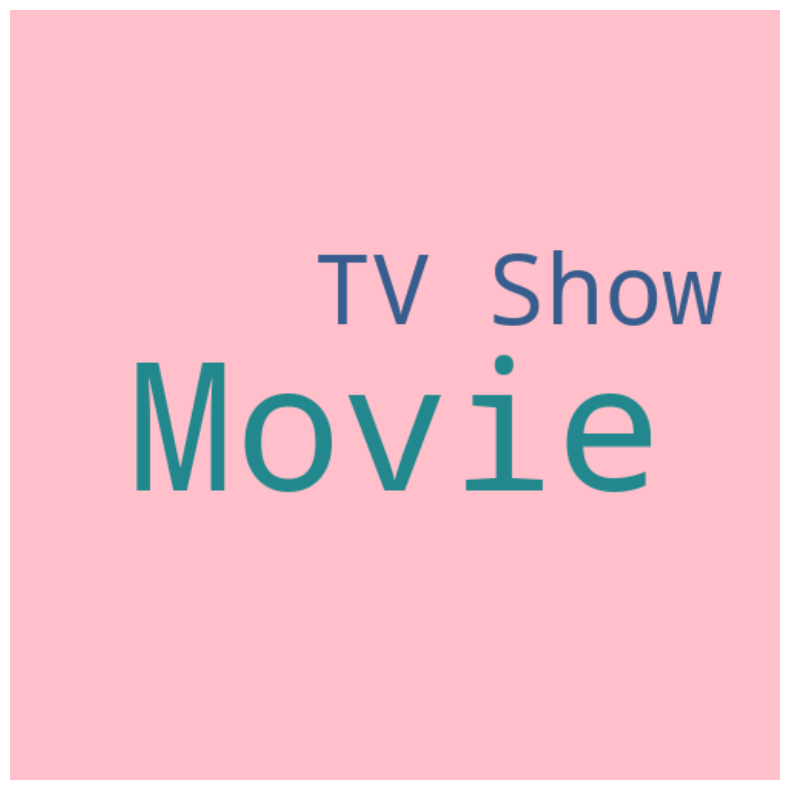

Looking for insights from title Movies/TV Shows


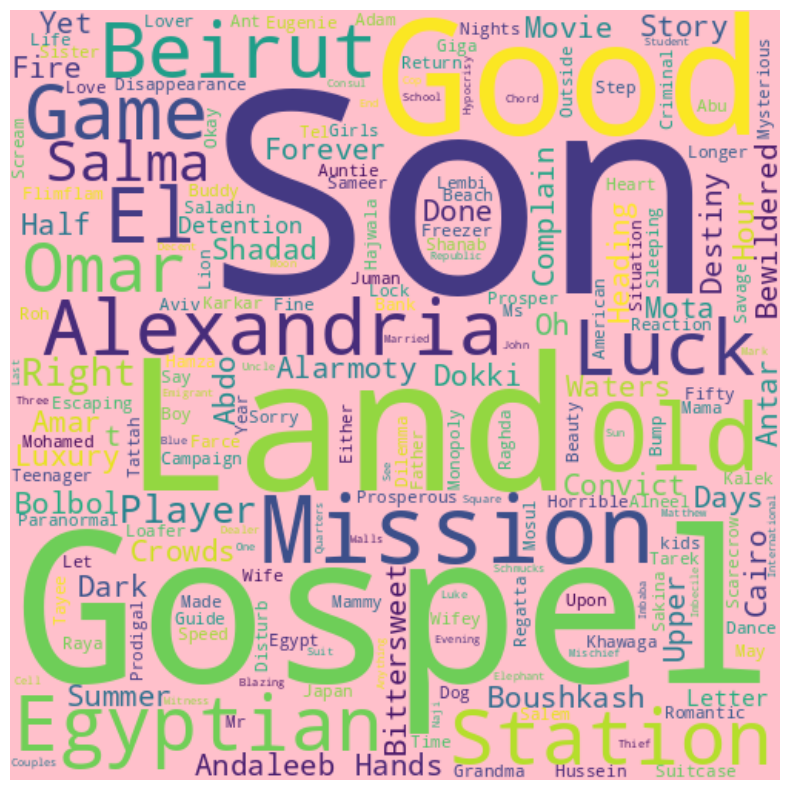

Looking for insights from country Movies/TV Shows


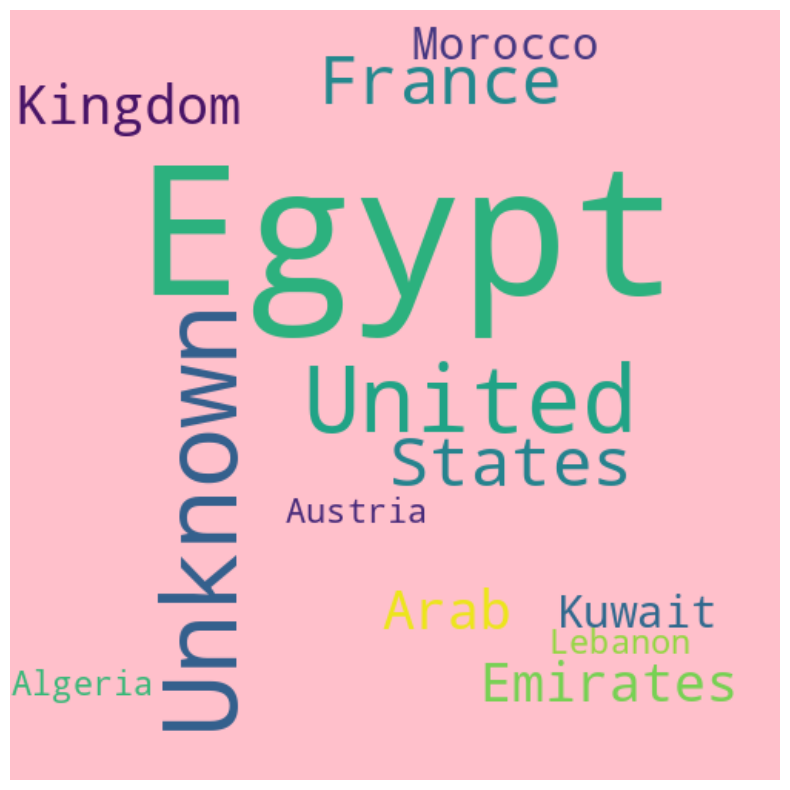

Looking for insights from rating Movies/TV Shows


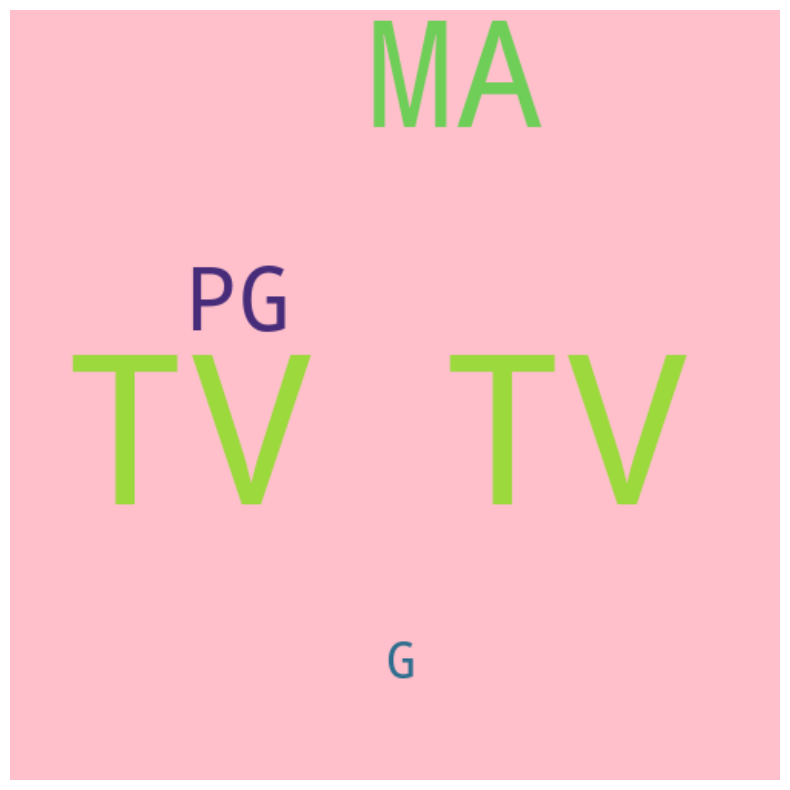

Looking for insights from listed_in Movies/TV Shows


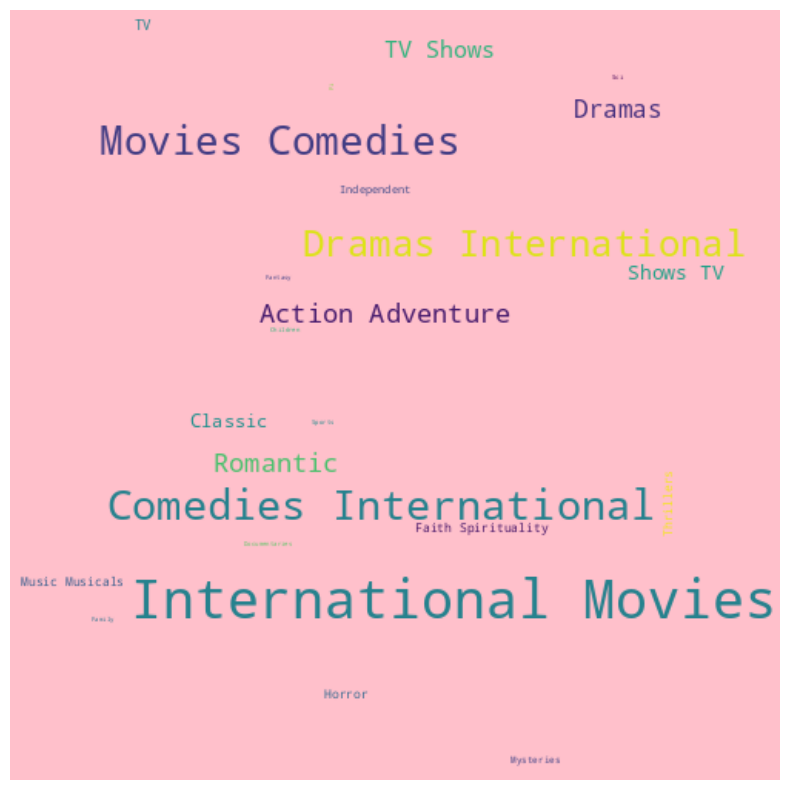

Looking for insights from description Movies/TV Shows


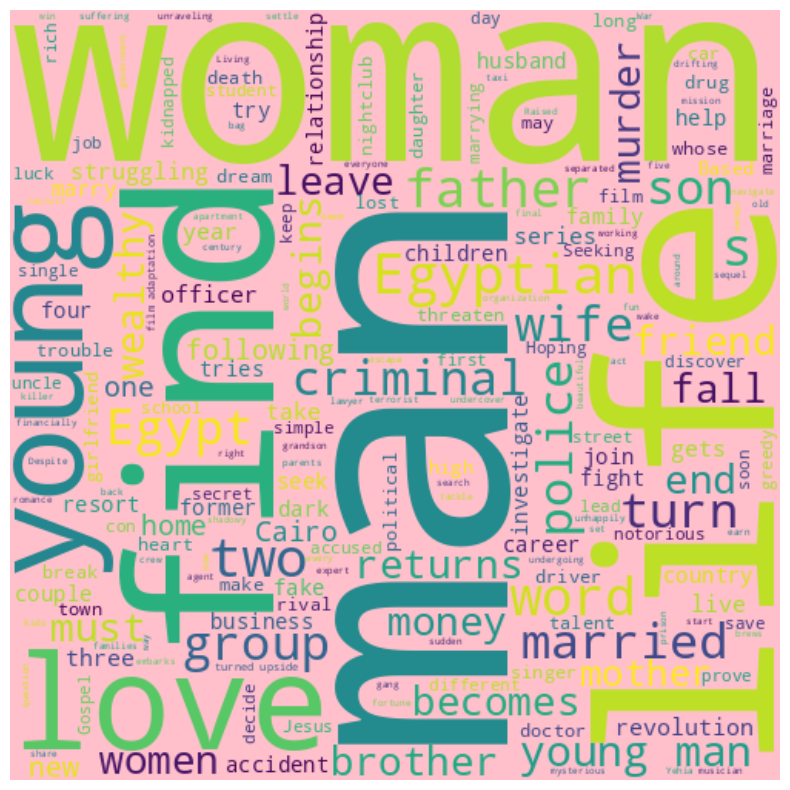

In [ ]:
word_count(11)

Cluster 11 in a dataset contains a total of 410 words. The most frequently occurring words in this cluster are as follows:

**Type** -  Movie & Tv shows

**Title** - Special, America,Time,Live,Comedy, Netflix Alive,
  Martin

**Country** - United States,Brazil,Mexico,Italy

**Rating** -TV-MA,TV-PG

**Listed_in** - Tv-Comedies, Comedy Stand, Talk shows
            

**Description**- Stand Comedy, Comic, Take, Life, Live, Share,Stories.

## **Recommender system**


A **recommender system is a type of information filtering system that suggests items to users based on their preferences**, interests, or past behavior. **It is commonly used in various applications such as e-commerce websites, streaming platforms, social media, and more.** The goal of a recommender system is to provide personalized recommendations that are relevant and helpful to the individual user.


**Content-based filtering:** This approach recommends items similar to the ones a user has liked or interacted with in the past. It analyzes the content or attributes of items and finds similar items to recommend. For example, if a user enjoys watching action movies, the system may recommend other action movies based on genre, actors, or plot.



In [ ]:
# Import necessary libraries
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Create a TfidfVectorizer instance with 'english' stopwords removed
tfidf = TfidfVectorizer(stop_words='english')

# Replace any NaN (missing) values in the 'description' column with an empty string
netflix_df['description'] = netflix_df['description'].fillna('')

# Fit the TF-IDF vectorizer on the 'description' column and transform the data
tfidf_matrix = tfidf.fit_transform(netflix_df['description'])

# Output the shape of tfidf_matrix
tfidf_matrix.shape

(7777, 17893)

In [ ]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [ ]:
cosine_sim

array([[1.        , 0.        , 0.05825749, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.09599165, 0.        ,
        0.        ],
       [0.05825749, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.09599165, 0.        , ..., 1.        , 0.        ,
        0.02818552],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.02818552, 0.        ,
        1.        ]])

In [ ]:
# The indices will be based on the 'title' column of 'netflix_df'
# This allows for quick lookup of movie indices using movie titles
indices = pd.Series(netflix_df.index, index=netflix_df['title']).drop_duplicates()

In [ ]:
# Define a function named get_recommendations that takes a movie title and an optional cosine similarity matrix as input
def get_recommendations(title, cosine_sim=cosine_sim):

  # Find the index of the input movie title using the 'indices' mapping created earlier
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]
    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_df['title'].iloc[movie_indices]

In [ ]:
# Extract a subset of movie titles from the 'title' column of the 'netflix_movies1' DataFrame
# This subset includes rows from index 1 to 69 (70-1), excluding the first row (index 0)
netflix_df['title'][1:70]

1                                                  7:19
2                                                 23:59
3                                                     9
4                                                    21
5                                                    46
                            ...                        
65                                              13 Sins
66                                                 13TH
67    13TH: A Conversation with Oprah Winfrey & Ava ...
68                                            14 Blades
69                                           14 Cameras
Name: title, Length: 69, dtype: object

In [ ]:
# Call the 'get_recommendations' function to find movie recommendations for the movie '14 Cameras'

recommendations = get_recommendations('14 Cameras', cosine_sim)
print(recommendations)

5064                           Ragini MMS
5425                  Scandal in Sorrento
2383                               Get In
541                                  Anon
7568                       What We Wanted
2087    Fabulous Lives of Bollywood Wives
7095                           Time Share
6975                         The Vanished
1092                             Breakout
5465                Secreto bien guardado
Name: title, dtype: object


# **Conclusion**

Write the conclusion here.

**1-** Exploring the dataset consist of 7787 records and 12 attributes, with a focus on missing value imputation and exploratory data analysis (EDA).

**2-** The analysis revealed that Netflix has a greater number of movies than TV shows, with a rapidly growing collection of shows from the United States.

**3-** It is interesting to note that the majority of the content available on Netflix consists of movies. However, in recent years, the platform has been focusing more on TV shows.

**4-** Most of these shows are released either at the end or the beginning of the year.

**5-** The United States and India are among the top five countries that produce all of the available content on the platform. Additionally, out of the top ten actors with the maximum content, six of them are from India.

**6-** When it comes to content ratings, TV-MA tops the charts,
 indicating that mature content is more popular on Netflix.

**7-** The value of k=15 was found to be optimal for clustering the data, and it was used to group the content into ten distinct clusters.

**8-** Using this data, a Content based recommender system was created using cosine similarity, which provided recommendations for Movies and TV shows.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***